# Global Power Plant

## Importing important Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import PowerTransformer 
from scipy.stats import zscore
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')


# Data Description

### Global Power Plant Database
#### Problem Statement:
##### Description

The Global Power Plant Database is a comprehensive, open source database of power plants around the world. It centralizes power plant data to make it easier to navigate, compare and draw insights for one’s own analysis. The database covers approximately 35,000 power plants from 167 countries and includes thermal plants (e.g. coal, gas, oil, nuclear, biomass, waste, geothermal) and renewables (e.g. hydro, wind, solar). Each power plant is geolocated and entries contain information on plant capacity, generation, ownership, and fuel type. It will be continuously updated as data becomes available.


##### Key attributes of the database
The database includes the following indicators:

`country` (text): 3 character country code corresponding to the ISO 3166-1 alpha-3 specification [5]

`country_long` (text): longer form of the country designation

`name` (text): name or title of the power plant, generally in Romanized form

`gppd_idnr` (text): 10 or 12 character identifier for the power plant

`capacity_mw` (number): electrical generating capacity in megawatts

`latitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`longitude` (number): geolocation in decimal degrees; WGS84 (EPSG:4326)

`primary_fuel` (text): energy source used in primary electricity generation or export

`other_fuel1` (text): energy source used in electricity generation or export

`other_fuel2` (text): energy source used in electricity generation or export

`other_fuel3` (text): energy source used in electricity generation or export

 `commissioning_year` (number): year of plant operation, weighted by unit-capacity when data is 
 available
 
`owner` (text): majority shareholder of the power plant, generally in Romanized form

`source` (text): entity reporting the data; could be an organization, report, or document, generally in Romanized form


`url` (text): web document corresponding to the `source` field

`geolocation_source` (text): attribution for geolocation information

`wepp_id` (text): a reference to a unique plant identifier in the widely-used PLATTS-WEPP database.

`year_of_capacity_data` (number): year the capacity information was reported

`generation_gwh_2013` (number): electricity generation in gigawatt-hours reported for the year 2013

`generation_gwh_2014` (number): electricity generation in gigawatt-hours reported for the year 2014

`generation_gwh_2015` (number): electricity generation in gigawatt-hours reported for the year 2015

`generation_gwh_2016` (number): electricity generation in gigawatt-hours reported for the year 2016

`generation_gwh_2017` (number): electricity generation in gigawatt-hours reported for the year 2017

`generation_gwh_2018` (number): electricity generation in gigawatt-hours reported for the year 2018

`generation_gwh_2019` (number): electricity generation in gigawatt-hours reported for the year 2019

`generation_data_source` (text): attribution for the reported generation information

`estimated_generation_gwh_2013` (number): estimated electricity generation in gigawatt-hours for the year 2013

`estimated_generation_gwh_2014` (number): estimated electricity generation in gigawatt-hours for the year 2014 

`estimated_generation_gwh_2015` (number): estimated electricity generation in gigawatt-hours for the year 2015 

`estimated_generation_gwh_2016` (number): estimated electricity generation in gigawatt-hours for the year 2016 
`estimated_generation_gwh_2017` (number): estimated electricity generation in gigawatt-hours for the year 2017 

'estimated_generation_note_2013` (text): label of the model/method used to estimate generation for the year 2013

`estimated_generation_note_2014` (text): label of the model/method used to estimate generation for the year 2014 

`estimated_generation_note_2015` (text): label of the model/method used to estimate generation for the year 2015

`estimated_generation_note_2016` (text): label of the model/method used to estimate generation for the year 2016

`estimated_generation_note_2017` (text): label of the model/method used to estimate generation for the year 2017 

#### Fuel Type Aggregation
We define the "Fuel Type" attribute of our database based on common fuel categories. 

Prediction :   Make two prediction  1) Primary Fuel    2) capacity_mw 

## Importing DataSet

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Bhushan0130/Datasets/main/database_IND.csv')
df.shape  # dataset shape

# (908, 25)

(908, 25)

In [3]:
pd.set_option('display.max_rows', None)  # to maximize display of the rows
pd.set_option('display.max_columns', None)  # to maximize display of the columns

In [4]:
df.head()  # top 5 rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,NaN,2011.0,Solar Paces,National Renewable Energy Laboratory,http://www.nrel.gov/csp/solarpaces/project_det...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,NaN,NaN,Ultratech Cement ltd,Ultratech Cement ltd,http://www.ultratechcement.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,NaN,NaN,AES,CDM,https://cdm.unfccc.int/Projects/DB/DNV-CUK1328...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,NaN,2004.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,NaN,2015.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [5]:
df.sample(4)   # 4 random column

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
660,IND,India,Rajgarh - Ujaas Solar Power Plant,WRI1026189,16.5,23.9796,76.7329,Solar,NaN,NaN,NaN,NaN,Ujaas Energy Limited,Ujaas Energy Limited,http://ujaas.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
853,IND,India,UPPAR INDRAVATI,IND0000481,600.0,19.4269,82.8594,Hydro,NaN,NaN,NaN,1999.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,2504.48465,2682.94785,1751.6378,1514.0318,1736.84215,Central Electricity Authority,NaN
742,IND,India,SURAT GARH,IND0000429,4.0,NaN,NaN,Hydro,NaN,NaN,NaN,1992.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
278,IND,India,IND BARATH TPP,IND0000153,350.0,21.6580,83.9200,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,19.6378,0.0000,0.00000,Central Electricity Authority,NaN


In [6]:
df.tail()      # 5 bottom rows

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,owner,source,url,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,NaN,2016.0,NaN,Central Electricity Authority,http://www.cea.nic.in/,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,NaN,NaN,Karnataka Power Corporation Limited,Karnataka Power Corporation Limited,http://karnatakapower.com,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,NaN,NaN,NaN,CDM,https://cdm.unfccc.int/Projects/DB/TUEV-RHEIN1...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,NaN,NaN,Hindustan Zinc ltd,Hindustan Zinc ltd,http://www.hzlindia.com/,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,NaN,NaN,iEnergy Wind Farms,CDM,https://cdm.unfccc.int/Projects/DB/RWTUV134503...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Information about dataset

In [7]:
df.info()

#  #   Column                    Non-Null Count  Dtype  
# ---  ------                    --------------  -----  
#  0   country                   908 non-null    object 
#  1   country_long              908 non-null    object 
#  2   name                      908 non-null    object 
#  3   gppd_idnr                 908 non-null    object 
#  4   capacity_mw               908 non-null    float64
#  5   latitude                  862 non-null    float64
#  6   longitude                 862 non-null    float64
#  7   primary_fuel              908 non-null    object 
#  8   other_fuel1               199 non-null    object 
#  9   other_fuel2               1 non-null      object 
#  10  other_fuel3               0 non-null      float64
#  11  commissioning_year        528 non-null    float64
#  12  owner                     342 non-null    object 
#  13  source                    908 non-null    object 
#  14  url                       908 non-null    object 
#  15  geolocation_source        889 non-null    object 
#  16  wepp_id                   0 non-null      float64
#  17  year_of_capacity_data     520 non-null    float64
#  18  generation_gwh_2013       384 non-null    float64
#  19  generation_gwh_2014       401 non-null    float64
#  20  generation_gwh_2015       425 non-null    float64
#  21  generation_gwh_2016       437 non-null    float64
#  22  generation_gwh_2017       443 non-null    float64
#  23  generation_data_source    450 non-null    object 
#  24  estimated_generation_gwh  0 non-null      float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [8]:
# Columns having different non null values mean null values are present in the dataset, 
# Two types of columns are present in the dataset, 12 columns are of object type and rest columns are of float type


In [9]:
df.dtypes

# country                      object
# country_long                 object
# name                         object
# gppd_idnr                    object
# capacity_mw                 float64
# latitude                    float64
# longitude                   float64
# primary_fuel                 object
# other_fuel1                  object
# other_fuel2                  object
# other_fuel3                 float64
# commissioning_year          float64
# owner                        object
# source                       object
# url                          object
# geolocation_source           object
# wepp_id                     float64
# year_of_capacity_data       float64
# generation_gwh_2013         float64
# generation_gwh_2014         float64
# generation_gwh_2015         float64
# generation_gwh_2016         float64
# generation_gwh_2017         float64
# generation_data_source       object
# estimated_generation_gwh    float64

country                      object
country_long                 object
name                         object
gppd_idnr                    object
capacity_mw                 float64
latitude                    float64
longitude                   float64
primary_fuel                 object
other_fuel1                  object
other_fuel2                  object
other_fuel3                 float64
commissioning_year          float64
owner                        object
source                       object
url                          object
geolocation_source           object
wepp_id                     float64
year_of_capacity_data       float64
generation_gwh_2013         float64
generation_gwh_2014         float64
generation_gwh_2015         float64
generation_gwh_2016         float64
generation_gwh_2017         float64
generation_data_source       object
estimated_generation_gwh    float64
dtype: object

## Checking Null Values

In [10]:
df.isnull().sum()
# 0 Null values are present in the dataset

country                       0
country_long                  0
name                          0
gppd_idnr                     0
capacity_mw                   0
latitude                     46
longitude                    46
primary_fuel                  0
other_fuel1                 709
other_fuel2                 907
other_fuel3                 908
commissioning_year          380
owner                       566
source                        0
url                           0
geolocation_source           19
wepp_id                     908
year_of_capacity_data       388
generation_gwh_2013         524
generation_gwh_2014         507
generation_gwh_2015         483
generation_gwh_2016         471
generation_gwh_2017         465
generation_data_source      458
estimated_generation_gwh    908
dtype: int64

In [11]:
df.isnull().sum().sum()

# 8693

8693

<AxesSubplot:>

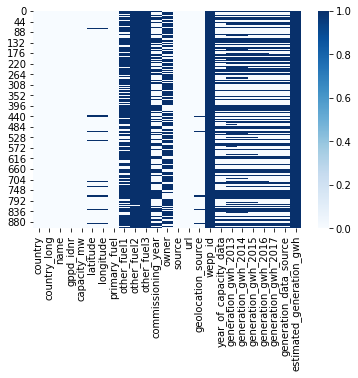

In [12]:
sns.heatmap(df.isnull(), cmap = 'Blues')  # Graphical representation of Non null dataset

In [13]:
# We can see in above heatmap, lots of null values are present in the dataset

##### Percentage of Null value of columns

In [14]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
null_percentage[null_percentage > 0.01]

# latitude                      5.066079
# longitude                     5.066079
# other_fuel1                  78.083700
# other_fuel2                  99.889868
# other_fuel3                 100.000000
# commissioning_year           41.850220
# owner                        62.334802
# geolocation_source            2.092511
# wepp_id                     100.000000
# year_of_capacity_data        42.731278
# generation_gwh_2013          57.709251
# generation_gwh_2014          55.837004
# generation_gwh_2015          53.193833
# generation_gwh_2016          51.872247
# generation_gwh_2017          51.211454
# generation_data_source       50.440529
# estimated_generation_gwh    100.000000

latitude                      5.066079
longitude                     5.066079
other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
commissioning_year           41.850220
owner                        62.334802
geolocation_source            2.092511
wepp_id                     100.000000
year_of_capacity_data        42.731278
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

In [15]:
# we should delete the column which column having more than 50% null values
# If we impute mean , median or mode value in these column then it may leads to build a bad model

In [16]:
# Column which are having more than 50 % null values

null_percentage = df.isnull().sum() / df.shape[0] * 100
null_percentage[null_percentage > 50.0]

# other_fuel1                  78.083700
# other_fuel2                  99.889868
# other_fuel3                 100.000000
# owner                        62.334802
# wepp_id                     100.000000
# generation_gwh_2013          57.709251
# generation_gwh_2014          55.837004
# generation_gwh_2015          53.193833
# generation_gwh_2016          51.872247
# generation_gwh_2017          51.211454
# generation_data_source       50.440529
# estimated_generation_gwh    100.000000

other_fuel1                  78.083700
other_fuel2                  99.889868
other_fuel3                 100.000000
owner                        62.334802
wepp_id                     100.000000
generation_gwh_2013          57.709251
generation_gwh_2014          55.837004
generation_gwh_2015          53.193833
generation_gwh_2016          51.872247
generation_gwh_2017          51.211454
generation_data_source       50.440529
estimated_generation_gwh    100.000000
dtype: float64

In [17]:
null_percentage[null_percentage > 50.0].keys()

# Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'wepp_id',
#        'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
#        'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
#        'estimated_generation_gwh'],
#       dtype='object')
# Need to delete these columns

Index(['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'wepp_id',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [18]:
# remove columns which are having more than 60 % null values
df.shape

# (908, 25)

(908, 25)

##### Columns Droped which are having more than 60% null values
we can not apply any imputation for these column because these column are containing so much null values

In [19]:
df.drop(columns = ['other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'wepp_id',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'], inplace = True)
df.shape
# (908, 19)

(908, 13)

In [20]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'commissioning_year', 'source',
       'url', 'geolocation_source', 'year_of_capacity_data'],
      dtype='object')

In [21]:
object_col = df.select_dtypes(include = ['object']).keys()
object_col

Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'source', 'url', 'geolocation_source'],
      dtype='object')

In [22]:
for i in object_col:
    print(i, ':', df[i].nunique())
    
# country : 1
# country_long : 1
# name : 908
# gppd_idnr : 908
# primary_fuel : 8
# source : 191
# url : 304
# geolocation_source : 3
# generation_data_source : 1

country : 1
country_long : 1
name : 908
gppd_idnr : 908
primary_fuel : 8
source : 191
url : 304
geolocation_source : 3


In [23]:
# country and country_long columns having same info, and only one unique value, we will delete these column
# it would be good for our model building

# Name and gppd_idnr column are just a unique value for each record, it do not contribute to predict target variable
# therefore we will delete these two column too

# url column is not needed to build a machine learning model
# generation_data_source is having more than 50% null values are also not giving information which is relevent to predict
# target variables, therefore it is better to delet this column
print('Before: ', df.shape)
df.drop(columns = ['country', 'country_long', 'name', 'gppd_idnr', 'url'], inplace = True)
print('After: ',df.shape)

Before:  (908, 13)
After:  (908, 8)


In [24]:
# year_of_capacity_data (number): year the capacity information was reported
# this column is not giving much information , having year, only 
# Hence better to delete this column from dataset
print(df['year_of_capacity_data'].unique())

df.drop(columns = ['year_of_capacity_data'], inplace = True)
df.shape

[  nan 2018.]


(908, 7)

In [25]:
# Now only 7 columns are left and 908 rows are present in our dataset

In [26]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,NaN,Ultratech Cement ltd,WRI


In [27]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
null_percentage[null_percentage > 0.01]

latitude               5.066079
longitude              5.066079
commissioning_year    41.850220
geolocation_source     2.092511
dtype: float64

In [28]:
object_col = df.select_dtypes(include = ['object']).keys()
object_col

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [29]:
# As we can see , geolocationo_source column is containing only 2 percente of null value, we apply mode operation for
# null value imputation

df['geolocation_source'].fillna(df['geolocation_source'].mode()[0], inplace = True)

In [30]:
# In the commissioning_year column we can not impute mean or median value because this is a year column
# there mode operation will be best here
df['commissioning_year'].fillna(df['commissioning_year'].mode()[0], inplace = True)

In [31]:
null_percentage = df.isnull().sum() / df.shape[0] * 100
null_percentage[null_percentage > 0.01]

# latitude     5.066079
# longitude    5.066079

latitude     5.066079
longitude    5.066079
dtype: float64

In [32]:
# As these null value columns are of float type, therefore we have to apply mean or median imputation of these column
# for selection of mean and median need to visualis impact of mean and median 

##### Mean and Median Operation

In [33]:
mean_df = df.copy()
median_df = df.copy()

In [34]:
# latitude              5.066079 %
# longitude             5.066079 %

In [35]:
# mean imputation of null values

mean_df['latitude'] = mean_df['latitude'].fillna(mean_df['latitude'].mean()) 
mean_df['longitude'] = mean_df['longitude'].fillna(mean_df['longitude'].mean())

In [36]:
mean_df.isnull().sum().sum()

# 0

0

In [37]:
# median imputation of null values

median_df['latitude'] = median_df['latitude'].fillna(median_df['latitude'].median()) 
median_df['longitude'] = median_df['longitude'].fillna(median_df['longitude'].median())

In [38]:
median_df.isnull().sum().sum()

# 0

0

##### Visualisation of Imputed mean and median

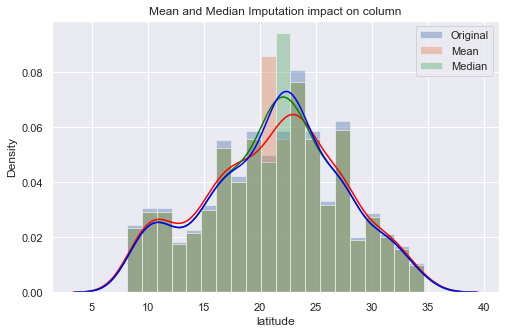

In [39]:
plt.figure(figsize = (8, 5))
sns.set()
   
plt.title ('Mean and Median Imputation impact on column')
sns.distplot(df['latitude'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['latitude'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['latitude'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()

In [40]:
# As we seen in above visulisation, latitude column is almost normally distributed and 
# we can see mean data distribution is much closer to original data as compare to median dataset
# As we also know that, if data is normally distributed then we should apply mean operation to the column
# Therefore, now, we will apply mean operation to the latitude column for removing null values

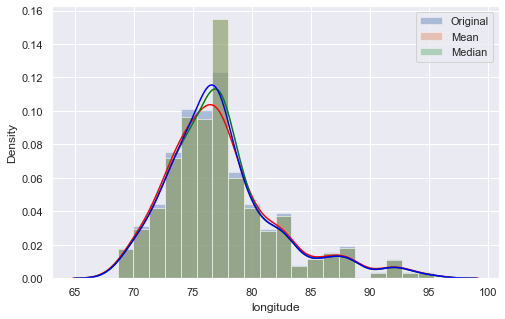

In [41]:
plt.figure(figsize = (8, 5))
sns.set()
   
sns.distplot(df['longitude'], bins = 20, kde_kws = { 'color' : 'red' }, label = "Original")
sns.distplot(mean_df['longitude'], bins = 20, kde_kws = {'color' : 'green' }, label = 'Mean')
sns.distplot(median_df['longitude'], bins = 20, kde_kws = {'color' : 'blue' }, label = 'Median')
plt.legend()

In [42]:
# Red kde line is denoting original data column distribution 
# we found that in column median imputation is giving much closer distribution towards original distribution
# as compare to median imputation
# And this is columns is also skewed, and if we found column skewed we apply median operation 
# hence, on Longitude column we will apply median operation for removing null values

###### Apply to the original dataset

In [43]:
df.isnull().sum().sum()
# 92

92

In [44]:
df['latitude'] = df['latitude'].fillna(df['latitude'].mean()) 
df['longitude'] = df['longitude'].fillna(df['longitude'].median())

In [45]:
df.isnull().sum().sum()
# 0

0

<AxesSubplot:>

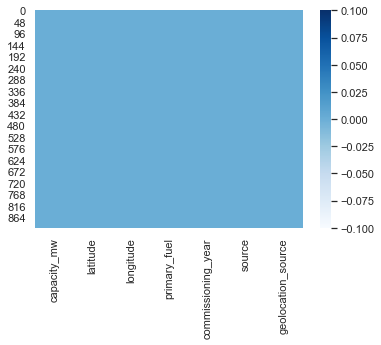

In [46]:
sns.heatmap(df.isnull(), cmap = 'Blues')

In [47]:
# Now dataset is clear, no null values are present in the dataset,
# and this dataset is ready to perform further operation for ML model building
df.shape
# (908, 7)

(908, 7)

In [48]:
df.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,National Renewable Energy Laboratory
1,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI


## Data Preprocessing

In [49]:
df.dtypes

# capacity_mw           float64
# latitude              float64
# longitude             float64
# primary_fuel           object
# commissioning_year    float64
# source                 object
# geolocation_source     object

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel           object
commissioning_year    float64
source                 object
geolocation_source     object
dtype: object

In [50]:
# All categorical type columns name
object_col = df.select_dtypes(include = 'object').keys()
object_col

# Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

In [51]:
# All float type columns name

float_col = df.select_dtypes(include = 'float64').keys()
float_col

# Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year'], dtype='object')

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year'], dtype='object')

In [52]:
for i in object_col:
    print('___________________',i,'______________________')
    print(df[i].value_counts())

___________________ primary_fuel ______________________
Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64
___________________ source ______________________
Central Electricity Authority                                  520
CDM                                                            124
Lancosola                                                       10
National Renewable Energy Laboratory                             8
National Thermal Power Corporation (NTPC)                        6
Maharashtra State Power Generation Co Ltd (MAHAGENCO)            4
Reliance Power Ltd                                               4
Rajasthan Renewable Energy Corporation Limited (RREC)            4
Jk Cement ltd                                                    4
Acc Acc ltd                                                      4
Jaypee Ltd jccl)                                                 3
Hind

In [53]:
# No of unique work in categorical columns
for i in object_col:
    print(i, ':  ',df[i].nunique(), 'Unique values')
    
# primary_fuel :   8 Unique values
# source :   191 Unique values
# geolocation_source :   3 Unique values

primary_fuel :   8 Unique values
source :   191 Unique values
geolocation_source :   3 Unique values


In [54]:
# We can apply short form for value count of geolocation_source columns, as given below
# WRI: (World Resource Institute)
# IA: (Industry About)                        
# NREL: (National Renewable Energy Laboratory)
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

In [55]:
df['geolocation_source'].replace( {'Industry About' : 'IA', 'National Renewable Energy Laboratory': 'NREL' }, inplace = True)

In [56]:
df.geolocation_source.value_counts()

# WRI     785
# IA      119
# NREL      4

WRI     785
IA      119
NREL      4
Name: geolocation_source, dtype: int64

In [57]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NREL
1,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


## Visualization

In [58]:
float_col
# Index(['capacity_mw', 'latitude', 'longitude'], dtype='object')

Index(['capacity_mw', 'latitude', 'longitude', 'commissioning_year'], dtype='object')

### Checking outliers:

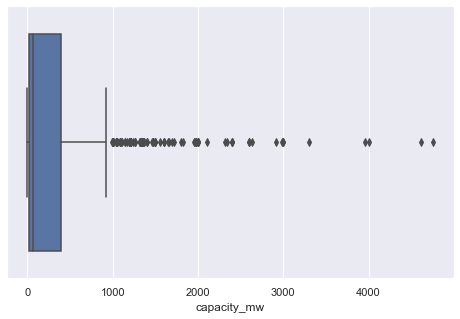

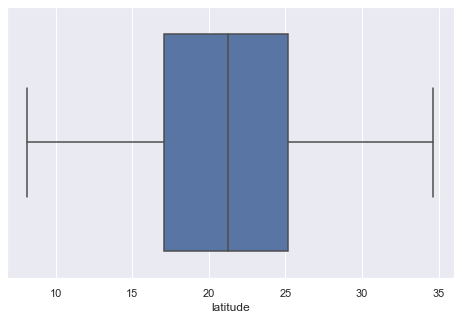

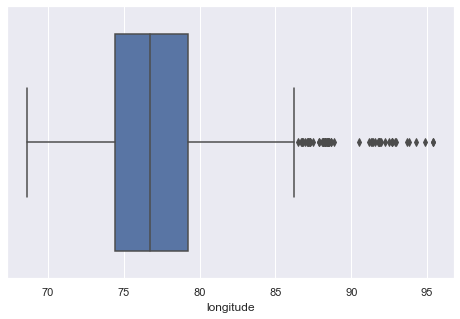

In [59]:
for i in float_col[:-1]:
    plt.figure(figsize =  (8,5))
    sns.boxplot(df[i])

In [60]:
# capacity_mw column is containing outliers, and maximum values of this column is laying in range of 0 to 1000
# latitude column is the only column in which no outlier present
# longitude column is also containing outliers, and having minimum value at 65 approx and maximum value at 87 approx


### Check Skewness

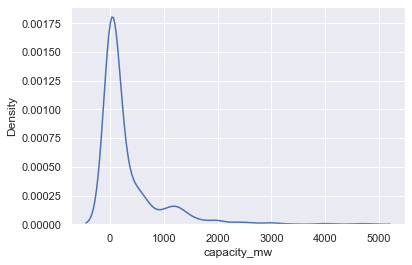

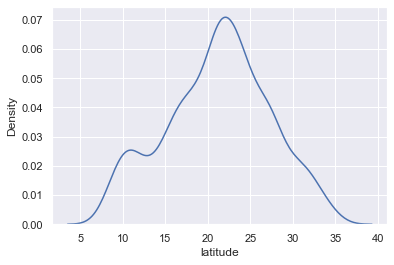

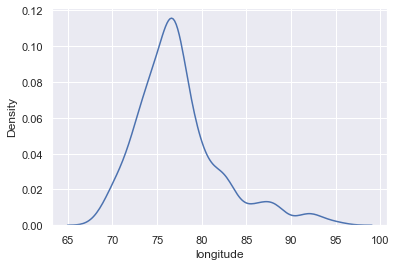

In [61]:
for i in float_col[:-1]:
    plt.figure()
    sns.distplot(df[i], hist = False)

In [62]:
# Capacity_mw column is little bit right skewed 
# As we have already observed at the time of mean imputaion latitude column is almost normally distributed column
# Longitude column is also right skewed column, we need check their skewness value 
# and perform necessary operation accordingly

### Distribution of columns

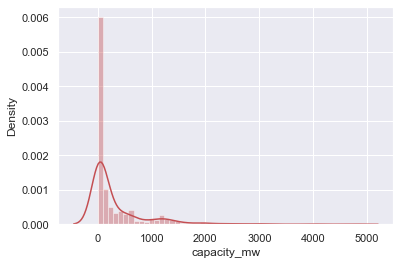

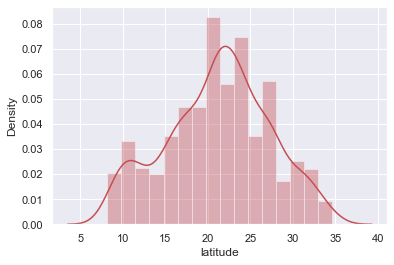

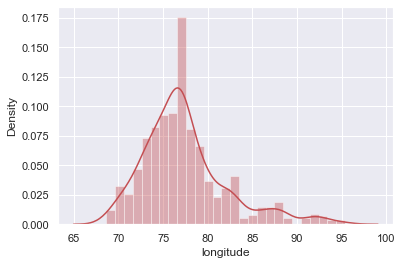

In [63]:
for i in float_col[:-1]:
    plt.figure()
    sns.distplot(df[i], kde = True, color = 'r')

In [64]:

# Majority of values of capacity_mw column is laying under the range of  to 1000
# and as column is skewed indicating outliers are present in the dataset
# latitude column is showing highest value at near to 20 approx
# and minium value at 7 approx with maxium value 40

# highest number of longitude column values are laying in the range of 75 to 80
# Showing least value at 70 and maxium value at 95

### Spread of float type columns

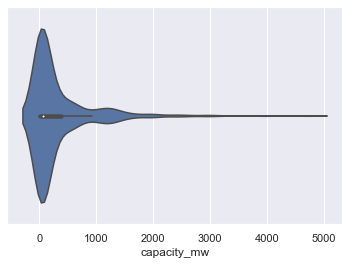

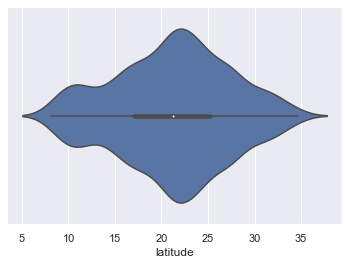

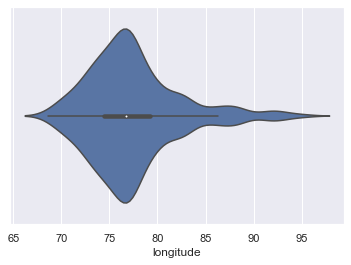

In [65]:
for i in float_col[:-1]:
    plt.figure()
    sns.violinplot(df[i], orient = 'vertical')

In [66]:
# Capacity_mw column is less spreaded
# latitude column is well spreaded 
# longitude is also well spreaded but having outliers too and having less spread of data as compare to latitude
# Need to revmove skewness and also outleirs of the dataset

#### Pattern of Float type columns with each other

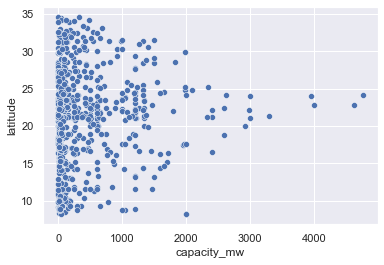

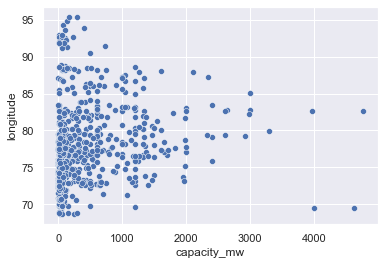

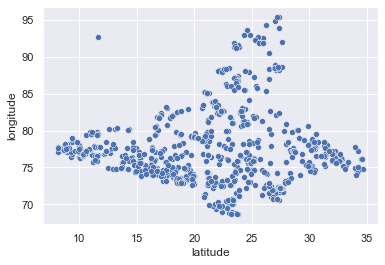

In [67]:
for i in range(len(float_col[:-1])):
    for j in float_col[:-1][i +1:]:
        plt.figure()
        sns.scatterplot(df[float_col[:-1][i]], df[j])

In [68]:
# Very hardly we can find any pattern between float type columns 
# No pattern found between float type columns'

### For categorical Features

In [69]:
for i in object_col:
    print(i, ' column, have unique value : ', df[i].nunique())
    
# primary_fuel  column, have unique value :  8
# source  column, have unique value :  191
# geolocation_source  column, have unique value :  3

primary_fuel  column, have unique value :  8
source  column, have unique value :  191
geolocation_source  column, have unique value :  3


### Countplot

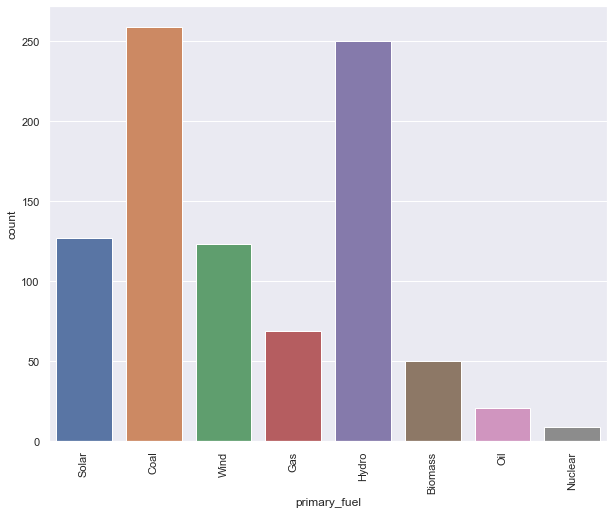

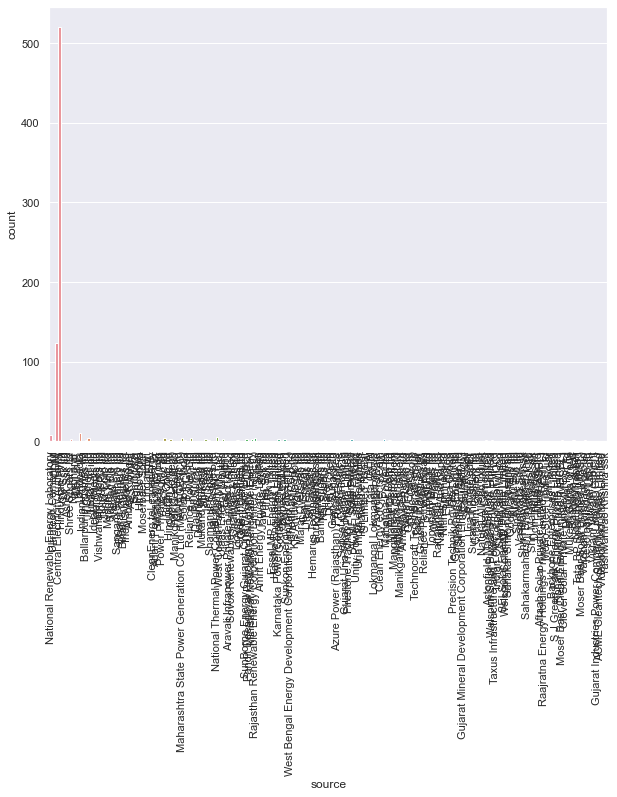

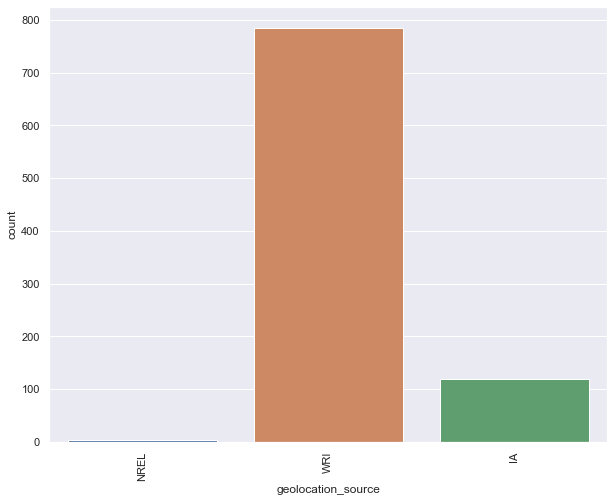

In [70]:
for i in object_col:
    l = list(df[i].unique())
    plt.figure(figsize = (10, 8))
    countplot = sns.countplot(df[i])
    countplot.set_xticklabels(labels = l, rotation = 90)

In [71]:
# Coventional and orgnic class of 'type' feature are in equally distributed
# All class of region are balanced only West Test New mexico class need to balance as there is litle difference as observed
# Maxium obervation are taken in the month of sep and jun 
# Lease observation taken in month of Jun and Aug 
# Highlest obervation taken in 2017 year and least are taken in 2018

In [72]:
object_col

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

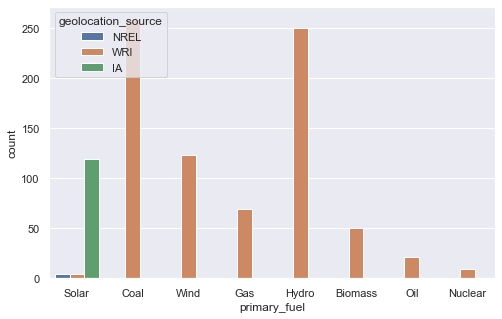

In [73]:
plt.figure(figsize = (8, 5))
sns.countplot(df['primary_fuel'], hue = df['geolocation_source'])

###### Let have a look onto percentage using pie chart

<AxesSubplot:ylabel='geolocation_source'>

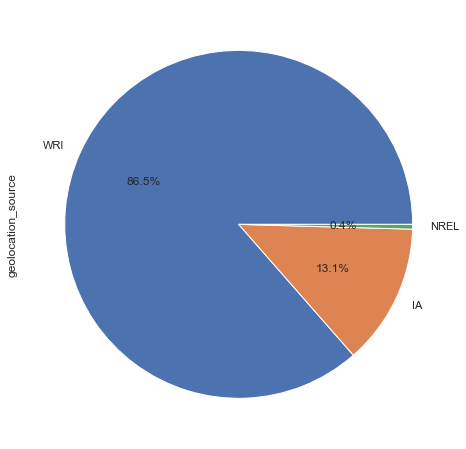

In [74]:
plt.figure(figsize = (10, 8))
df['geolocation_source'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [75]:
object_col

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

<AxesSubplot:ylabel='primary_fuel'>

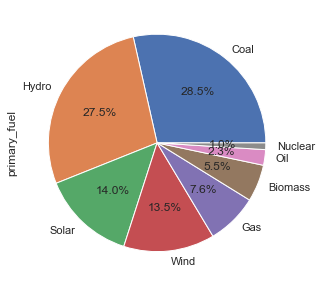

In [76]:
plt.figure(figsize = (8, 5))
df['primary_fuel'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [77]:
# highest percentage (10.7 %) of obervation are taken in jan month
# Least percentage of observation (7.1 %) are taken in jun and sep month

<AxesSubplot:ylabel='source'>

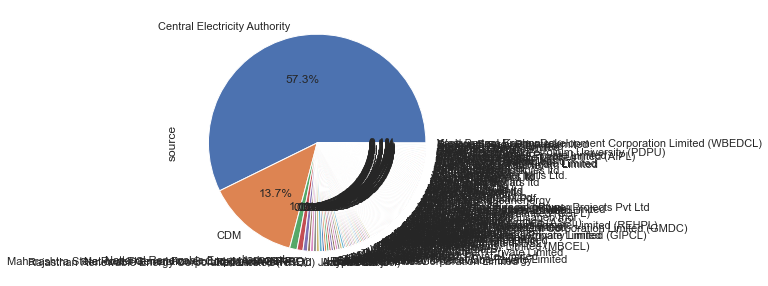

In [78]:
plt.figure(figsize = (8, 5))
df['source'].value_counts().plot(kind = 'pie', autopct = '%.1f%%')

In [ ]:
# Major(57.3%) source are from Central Electricity authority

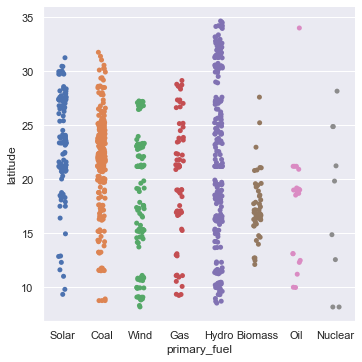

In [79]:
sns.catplot(x = "primary_fuel", y = "latitude", data = df)
plt.show()

In [ ]:
# Hydro fuel is containing highest value of latitude
# and Nuclear fuel is containing very less operation 

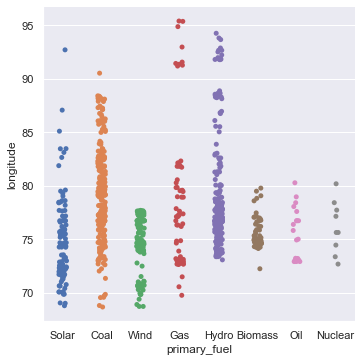

In [81]:
sns.catplot(x = "primary_fuel", y = "longitude", data = df)
plt.show()

In [82]:
# As maximum scatter points are present in the Coal fuel , indication maximum observation are of Coal fuel class
# # Very less class are available for Nuclear
# highest value of longitude is of Gas fuel
# This scatter is showing density of fuel classes

In [79]:
df.columns

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

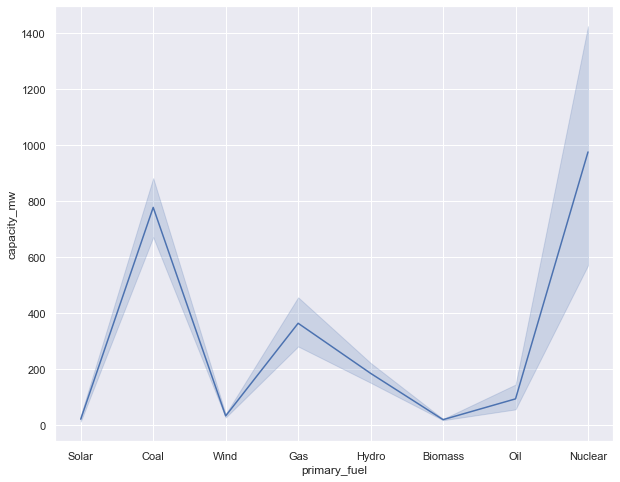

In [81]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'primary_fuel', y = 'capacity_mw', data = df)
plt.show()

In [82]:
# in the above graph, avgprice is highest at 2017 year and least at 2016

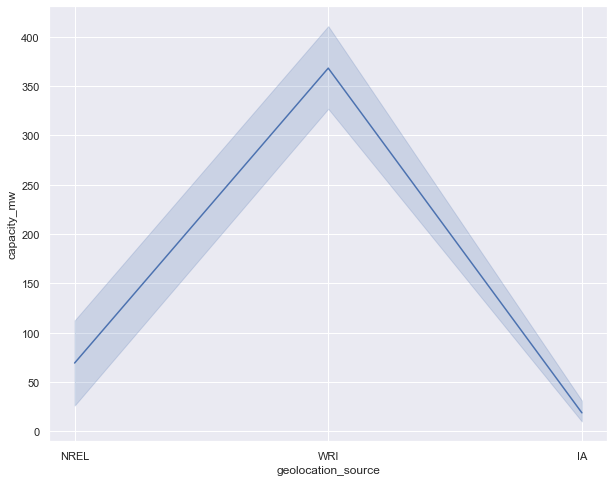

In [83]:
plt.figure(figsize = (10, 8))
sns.lineplot(x = 'geolocation_source', y = 'capacity_mw', data = df)
plt.show()

In [ ]:
# showing Peak value at Geolocationi_source
# and least value at IA

##### For "capacity_mw" column point of view

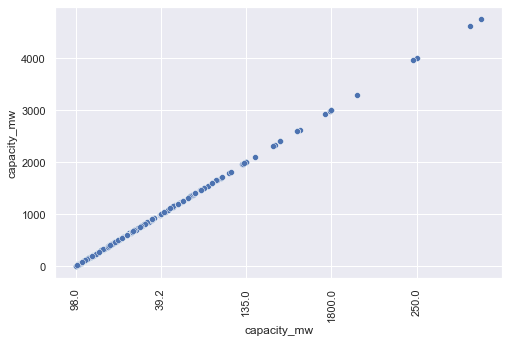

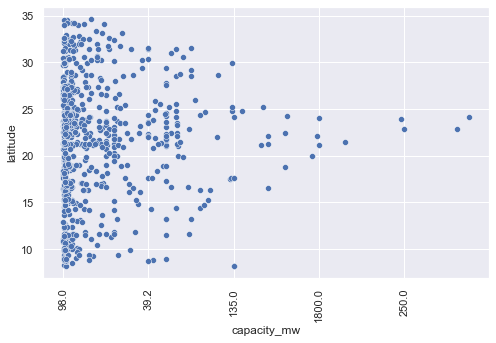

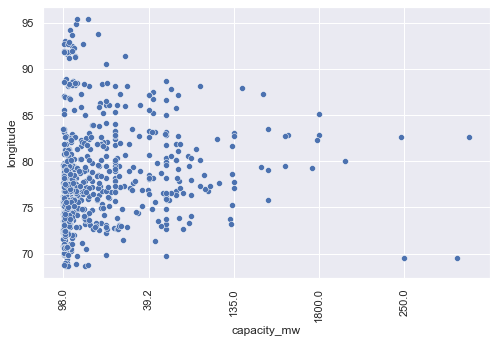

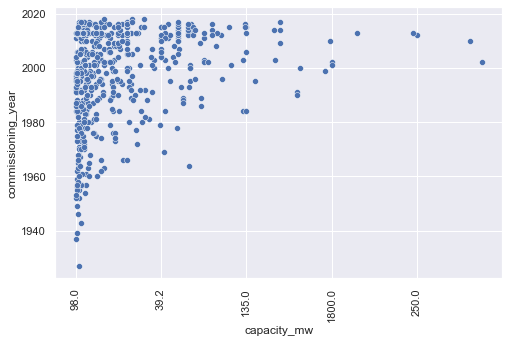

In [85]:
for i in float_col:
    l = df['capacity_mw'].unique()
    plt.figure(figsize = (8, 5))
    scat = sns.scatterplot(df['capacity_mw'], df[i])
    scat.set_xticklabels(labels = l, rotation = 90)
    plt.show()
# scat.x

# # l = list(df['region'].unique())
# plt.figure(figsize = (10, 8))
# bar = sns.countplot(df['region'], hue = df['type'])
# bar.set_xticklabels(labels = l, rotation = 90)
# plt.show()

### Correlation of the columns

In [86]:
df.corr()

,capacity_mw,latitude,longitude,commissioning_year
capacity_mw,1.000000,0.049790,0.200473,0.012518
latitude,0.049790,1.000000,0.031483,0.034896
longitude,0.200473,0.031483,1.000000,-0.144785
commissioning_year,0.012518,0.034896,-0.144785,1.000000


<AxesSubplot:>

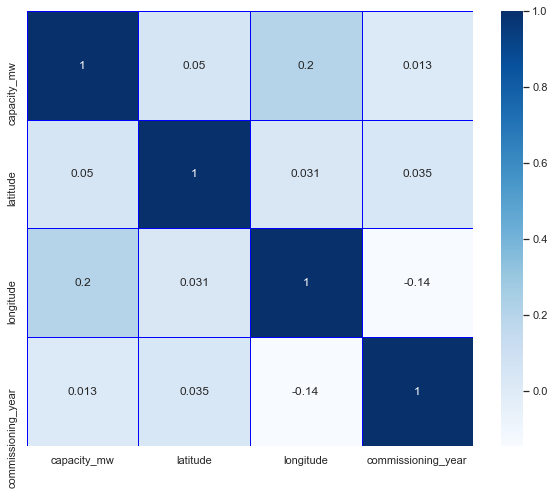

In [87]:
plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), annot = True, cmap = 'Blues', linewidth = 0.5, linecolor = 'blue' )   # Heatmap with number, 

In [88]:
# Total volumne and 4046 column is showing high correlation
# Total Volumne and 4225 column is showing high correlation
# In short Total volumne is showing with high correlation with maximum columns
# 4046, 4225 and 4770 are are showing high correlation with each other
# Total Bags and Small Bags are showing high correlation with almost every column except observation year

### Describe Data

In [89]:
df.describe()

,capacity_mw,latitude,longitude,commissioning_year
count,908.000000,908.000000,908.000000,908.000000
mean,321.046378,21.196189,77.410936,2003.624449
std,580.221767,6.088110,4.783873,15.238021
min,0.000000,8.168900,68.644700,1927.000000
25%,16.837500,17.057825,74.390250,1997.000000
50%,60.000000,21.278850,76.719250,2013.000000
75%,388.125000,25.183775,79.211600,2013.000000
max,4760.000000,34.649000,95.408000,2018.000000


<AxesSubplot:>

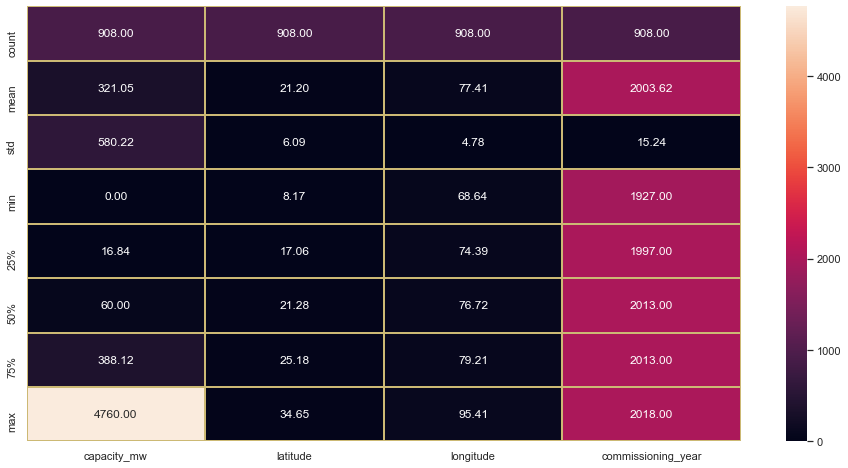

In [90]:
plt.figure(figsize = (16, 8))
sns.heatmap(df.describe(), annot = True, linewidth = 0.05, linecolor = 'y', fmt = "0.2f")

In [91]:
# Total volumne, 4046, 4225, 4770, Total bags, Small Bags, Large Bags and XLarge Bags columns are showing high difference 
# Between mean and 50 Percentile, which is telling that these columns are having outliers

# AveragePrice column is not much difference between mean and 50 percentile
# AveragePrice

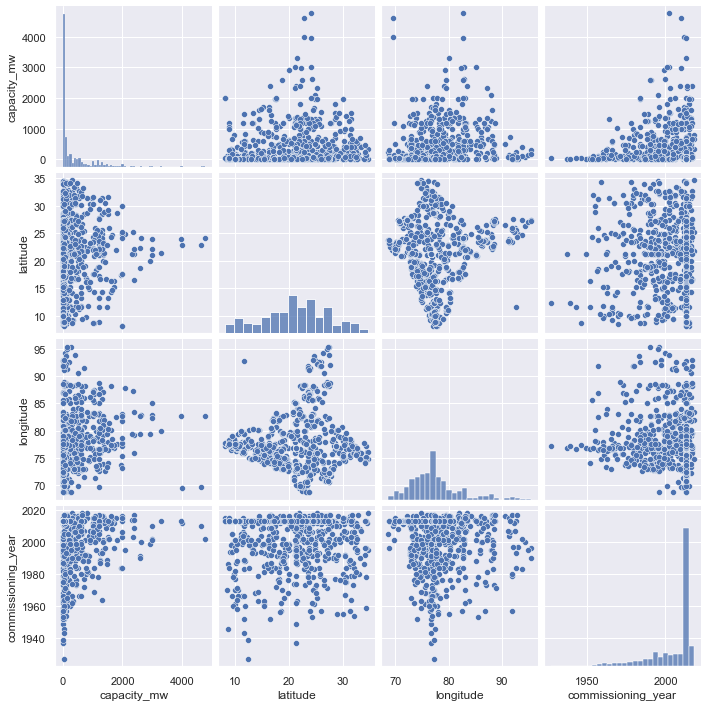

In [92]:
sns.pairplot(df)

## Encoding
##### Considering primary_fuel column as target variable

In [93]:
df1 = df.copy()

In [94]:
for i in object_col:
    print(i, ' column have ', len(df1[i].unique() ), 'unique values' )

# primary_fuel  column have  8 unique values
# source  column have  191 unique values
# geolocation_source  column have  3 unique values

primary_fuel  column have  8 unique values
source  column have  191 unique values
geolocation_source  column have  3 unique values


##### LabelEncoder
Applying Label Encoder to the Target variable

In [95]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [96]:
df1['primary_fuel'] = le.fit_transform(df1['primary_fuel'])
df1.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,National Renewable Energy Laboratory,NREL
1,98.0,24.7663,74.6090,1,2013.0,Ultratech Cement ltd,WRI


##### OrdinalEncoder:
 Encoder to the features

In [97]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [98]:
for i in ['source', 'geolocation_source']:
    df1[i] = oe.fit_transform(df1[i].values.reshape(-1,1))

In [99]:
df1.head(2)

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1,2013.0,174.0,2.0


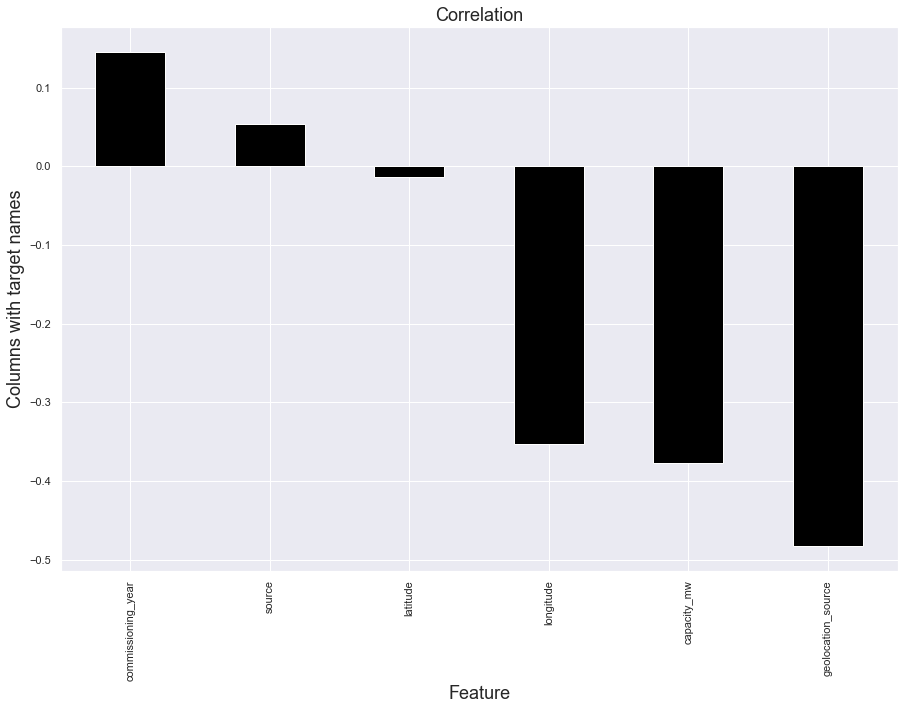

In [100]:
plt.figure(figsize = (15, 10))
df1.corr()['primary_fuel'].sort_values(ascending = False).drop(['primary_fuel']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

In [101]:
# commissioning_year and source are impacting positively to the target variable
# and geolocation_source, capacity_mw is impacting negatively to the targete variable
# Geelocation_source, is highly impacting to the target column
# latitude is impacting very less to the target

In [102]:
df1.dtypes

# capacity_mw           float64
# latitude              float64
# longitude             float64
# primary_fuel            int32
# commissioning_year    float64
# source                float64
# geolocation_source    float64

capacity_mw           float64
latitude              float64
longitude             float64
primary_fuel            int32
commissioning_year    float64
source                float64
geolocation_source    float64
dtype: object

### Outlier Removing Techniques

#### 1. Try zscore technique

In [103]:
from scipy.stats import zscore

In [104]:
z = np.abs(zscore(df1) )
df1_z = df1[(z < 3.1).all(axis = 1)] 
df1_z.shape

# (857, 7)

(857, 7)

In [105]:
(df1.shape[0] - df1_z.shape[0] ) / df1.shape[0]

#  0.05616740088105727  (approx 5% percent data loss we are getting by this method)
# should try other method too


0.05616740088105727

#### 2. IQR Technique

In [106]:
Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1 

In [107]:
df1_IQR = df1[~((df1 < (Q1 - 1.5*IQR) ) | (df1 > (Q3 + 1.5*IQR) )).any(axis = 1) ] 
df1_IQR.shape 
# (454, 7)

(454, 7)

In [108]:
(df1.shape[0] - df1_IQR.shape[0] ) / df.shape[0]

# This method is giving 50% data loss, therefore we can not implement this method to the dataset

0.5

In [109]:
# As we observed, both zscore method is giving 5 % dataloss to remove outliers
# we are considering zscore as it is giving data loss which is only 5 %

##### Applying zscore to the original dataset

In [110]:
z = np.abs(zscore(df1) )
df1 = df1[(z < 3.1).all(axis = 1)] 
df1.shape

# (857, 7)

(857, 7)

In [111]:
df1.columns 

Index(['capacity_mw', 'latitude', 'longitude', 'primary_fuel',
       'commissioning_year', 'source', 'geolocation_source'],
      dtype='object')

### Seperating dataset into x1 and y1 form

In [112]:
x1 = df1.drop(columns= ['primary_fuel'])
y1 = df1['primary_fuel']

print('shape of test', x1.shape)
print('shape of y', y1.shape)

# shape of test (857, 6)
# shape of y (857,)

shape of test (857, 6)
shape of y (857,)


### Removing Skewness

In [113]:
x1.skew()

# capacity_mw           2.007152
# latitude             -0.123729
# longitude             0.987934
# commissioning_year   -1.587338
# source                1.793669
# geolocation_source   -2.135436

capacity_mw           2.007152
latitude             -0.123729
longitude             0.987934
commissioning_year   -1.587338
source                1.793669
geolocation_source   -2.135436
dtype: float64

In [114]:
# log np.log(1 + variables) transformation 

x1['capacity_mw'] = np.log(1 + x1['capacity_mw'])
x1.skew()

# capacity_mw           0.066643
# latitude             -0.123729
# longitude             0.987934
# commissioning_year   -1.587338
# source                1.793669
# geolocation_source   -2.135436

capacity_mw           0.066643
latitude             -0.123729
longitude             0.987934
commissioning_year   -1.587338
source                1.793669
geolocation_source   -2.135436
dtype: float64

<AxesSubplot:xlabel='capacity_mw', ylabel='Density'>

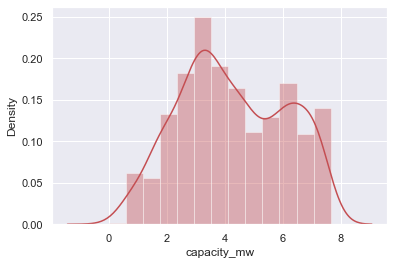

In [115]:
plt.figure()
sns.distplot(x1['capacity_mw'], color = 'r')
    
# columns almost seems like a normally distributed columns

In [116]:
x1.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,1.252763,28.1839,73.2407,2011.0,109.0,1.0
1,4.595120,24.7663,74.6090,2013.0,174.0,2.0
2,3.693867,21.9038,69.3732,2013.0,21.0,2.0
3,4.912655,23.8712,91.3602,2004.0,22.0,2.0
4,7.496097,21.9603,82.4091,2015.0,22.0,2.0


### Vetting of MultiColinearity 

##### Using VIF Technique

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [118]:
# function to calculate VIF
def cal_vif(data):   
    vif = pd.DataFrame()
    vif['Columns Name'] = data.columns
    vif['VIF'] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return (vif)

In [119]:
cal_vif(x1)

# 	Columns Name	VIF
# 0	capacity_mw	9.323814
# 1	latitude	13.762392
# 2	longitude	343.649888
# 3	commissioning_year	342.241479
# 4	source	2.858509
# 5	geolocation_source	11.979714


# for longitude column, it showing realtion with coomissioning_year and we have applied mode operation on
# the commisioning_year by considering it as categorical
# and we do not have left much data therefore we, will perform proceding on existing data

,Columns Name,VIF
0,capacity_mw,9.323814
1,latitude,13.762392
2,longitude,343.649888
3,commissioning_year,342.241479
4,source,2.858509
5,geolocation_source,11.979714


### SMOTE technique

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

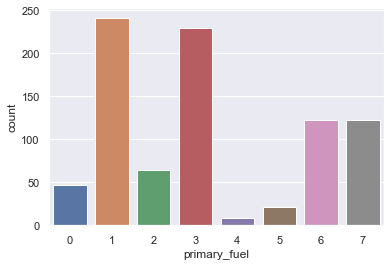

In [120]:
sns.countplot(y1)
# data is not balanced

In [121]:
from imblearn.over_sampling import SMOTE
smt = SMOTE()

In [122]:
x1, y1 = smt.fit_resample(x1, y1)

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

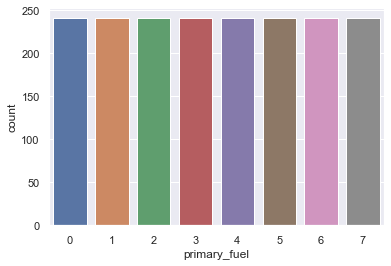

In [123]:
sns.countplot(y1)  
# Now data is balanced for model building

In [124]:
y1.value_counts()

# 0    241
# 1    241
# 2    241
# 3    241
# 4    241
# 5    241
# 6    241
# 7    241

6    241
1    241
7    241
2    241
3    241
0    241
5    241
4    241
Name: primary_fuel, dtype: int64

### Standiard Scaling 

In [125]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [126]:
x1.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,1.252763,28.1839,73.2407,2011.0,109.0,1.0
1,4.595120,24.7663,74.6090,2013.0,174.0,2.0
2,3.693867,21.9038,69.3732,2013.0,21.0,2.0
3,4.912655,23.8712,91.3602,2004.0,22.0,2.0
4,7.496097,21.9603,82.4091,2015.0,22.0,2.0


In [127]:
x1_scale = ss.fit_transform(x1)
x1 = pd.DataFrame(x1_scale, columns = x1.columns)

In [128]:
x1.head()

,capacity_mw,latitude,longitude,commissioning_year,source,geolocation_source
0,-1.738122,1.452875,-0.818788,0.514567,1.310826,-1.188182
1,0.171954,0.858352,-0.456673,0.680441,2.720311,0.369836
2,-0.343090,0.360394,-1.842303,0.680441,-0.597401,0.369836
3,0.353418,0.702641,3.976453,-0.065994,-0.575716,0.369836
4,1.829792,0.370223,1.607586,0.846316,-0.575716,0.369836


In [149]:
print('shape of x1: ', x1.shape)
print('shape of y1: ', y1.shape)

# shape of x1:  (1928, 6)
# shape of y1:  (1928,)

shape of x1:  (1928, 6)
shape of y1:  (1928,)


### Machine Learning for primary_fuel prediction

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [159]:
def randomstate (model, x, y):
    best_fit = []
    for i in range(0, 100 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [160]:
def checking (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = accuracy_score(m_predict_train, y_train)
        testing = accuracy_score(m_predict_test, y_test)

        print('At random state', i, 'the training accuracy is :-', training)
        print('At random state', i, 'the testing accuracy is :-', testing) 
        print('_________________________________________________________________')

In [161]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    m_pred = model.predict(x_train)
    
    training = accuracy_score(m_pred, y_train)
    testing = accuracy_score(pred, y_test)

    print('Training accuracy is :', training)
    print('Testing accuracy is :', testing) 
    
    print('__________________________________________________________________')
    print('Classification Report: \n', classification_report(pred, y_test) )
    print('Confusion Matrix: \n', confusion_matrix(pred, y_test) )
    print('___________________________________________________________________')
#     print('Cross value score')
    
#     # perform cross-validation
#     for i in range(4, 12):
#         cv_score = cross_val_score(model, x, y, cv = i ).mean()
#         print('cv score',  cv_score ,'at', i, 'cross fold')


#### Model 1:  LogisticRegression

In [162]:
best_fit1 = randomstate(LogisticRegression, x1, y1)
print(best_fit1)

[7, 14, 15, 17, 19, 20, 22, 29, 31, 36, 39, 40, 41, 44, 45, 46, 51, 53, 54, 56, 57, 59, 60, 62, 64, 68, 69, 70, 72, 73, 76, 77, 78, 83, 84, 85, 87]


In [163]:
checking (LogisticRegression, x1, y1, best_fit1)

At random state 7 the training accuracy is :- 0.6945885841363973
At random state 7 the testing accuracy is :- 0.6804835924006909
_________________________________________________________________
At random state 14 the training accuracy is :- 0.6834692364714603
At random state 14 the testing accuracy is :- 0.6804835924006909
_________________________________________________________________
At random state 15 the training accuracy is :- 0.6797627872498146
At random state 15 the testing accuracy is :- 0.6770293609671848
_________________________________________________________________
At random state 17 the training accuracy is :- 0.6775389177168273
At random state 17 the testing accuracy is :- 0.6839378238341969
_________________________________________________________________
At random state 19 the training accuracy is :- 0.6849518161601186
At random state 19 the testing accuracy is :- 0.6787564766839378
_________________________________________________________________
At random state 2

In [164]:
train(LogisticRegression, x1 , y1, 45)

Training accuracy is : 0.6879169755374351
Testing accuracy is : 0.689119170984456
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.76      0.80        83
           1       0.38      0.64      0.47        44
           2       0.38      0.48      0.42        50
           3       0.52      0.63      0.57        59
           4       0.91      0.61      0.73       103
           5       0.46      0.50      0.48        64
           6       0.97      1.00      0.99        69
           7       0.97      0.78      0.86       107

    accuracy                           0.69       579
   macro avg       0.68      0.67      0.67       579
weighted avg       0.74      0.69      0.70       579

Confusion Matrix: 
 [[63  4  1  0  0 15  0  0]
 [ 0 28  3 10  0  1  2  0]
 [ 0 13 24  2  0  8  0  3]
 [ 0  3  3 37  6 10  0  0]
 [ 0 18 12  9 63  1  0  0]
 [ 1  2 19 10  0 32 

In [165]:
print('Cross value score')
# perform cross-validation
for i in range(2, 8):
    cv_score = cross_val_score(LogisticRegression(), x1, y1, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.6773858921161826 at 2 cross fold
cv score 0.6789363526692925 at 3 cross fold
cv score 0.6784232365145227 at 4 cross fold
cv score 0.6758266603862458 at 5 cross fold
cv score 0.6779070967409041 at 6 cross fold
cv score 0.6799849425936382 at 7 cross fold


In [192]:
# LogisticRegression
# Training accuracy is : 0.6879169755374351
# Testing accuracy is : 0.689119170984456
# Highest cv value 0.6799 at cross fold 7

# This model is giving accuracy which is very near to cross value, this might be best model but we have
# to check other model too

##### Model 2: DecisionTreeClassifier

In [166]:
best_fit2 = randomstate(DecisionTreeClassifier, x1, y1)
print(best_fit2)

[]


In [167]:
max_acc = 0
random_s = 0

for i in range(21, 51):
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    model_pred = model.predict(x_test)
    acc = accuracy_score(model_pred, y_test)
    
    if acc > max_acc:
        max_acc = acc
        random_s = i
print('Model is giving best accurancy', max_acc, 'on random state of', random_s )

# Model is giving best accurancy 0.8791018998272885 on random state of 35

Model is giving best accurancy 0.8791018998272885 on random state of 35


In [168]:
train(DecisionTreeClassifier, x1 , y1, 35)

Training accuracy is : 1.0
Testing accuracy is : 0.8825561312607945
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.93      0.94        87
           1       0.63      0.75      0.69        57
           2       0.84      0.79      0.81        75
           3       0.76      0.83      0.79        63
           4       0.87      0.90      0.89        60
           5       0.96      0.82      0.88        79
           6       0.99      1.00      0.99        73
           7       1.00      0.99      0.99        85

    accuracy                           0.88       579
   macro avg       0.88      0.88      0.87       579
weighted avg       0.89      0.88      0.88       579

Confusion Matrix: 
 [[81  6  0  0  0  0  0  0]
 [ 2 43  5  4  2  1  0  0]
 [ 1  9 59  3  1  1  1  0]
 [ 0  6  0 52  4  1  0  0]
 [ 0  2  1  3 54  0  0  0]
 [ 0  2  5  6  1 65  0  0]
 [ 0  0

##### Cross value score for DecisionTreeClassifier

In [169]:
print('Cross value score')
# perform cross-validation
for i in range(2, 8):
    cv_score = cross_val_score(DecisionTreeClassifier(), x1, y1, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.8469917012448133 at 2 cross fold
cv score 0.8511415370254632 at 3 cross fold
cv score 0.8609958506224066 at 4 cross fold
cv score 0.8703263575802435 at 5 cross fold
cv score 0.8687799513683302 at 6 cross fold
cv score 0.8687709392057218 at 7 cross fold


In [170]:
# Training accuracy: 1.0
# Testiing accuracy: 0.8739
# Highest cv value 0.8703 at cross fold 5

# Accuracy of training > Accuracy of testing : this model is giving overfitted model
# we can not consider this model as our final model

##### Model 3: KNeighborsClassifier

In [171]:
best_fit3 = randomstate(KNeighborsClassifier, x1, y1)
print(best_fit3)

# Giving best fit at [90, 99]

[99]


In [172]:
checking (KNeighborsClassifier, x1 , y1, best_fit3)

At random state 99 the training accuracy is :- 0.8888065233506302
At random state 99 the testing accuracy is :- 0.8929188255613126
_________________________________________________________________


In [173]:
train (KNeighborsClassifier, x1 , y1, 99)

Training accuracy is : 0.8888065233506302
Testing accuracy is : 0.8929188255613126
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.87      0.92        91
           1       0.61      0.93      0.74        41
           2       0.86      0.79      0.82        75
           3       0.72      0.93      0.81        56
           4       1.00      0.87      0.93        78
           5       0.96      0.89      0.93        84
           6       1.00      0.97      0.99        71
           7       0.96      0.93      0.94        83

    accuracy                           0.89       579
   macro avg       0.89      0.90      0.88       579
weighted avg       0.91      0.89      0.90       579

Confusion Matrix: 
 [[79  8  0  0  0  1  0  3]
 [ 1 38  0  2  0  0  0  0]
 [ 0  9 59  6  0  1  0  0]
 [ 0  3  1 52  0  0  0  0]
 [ 0  3  3  4 68  0  0  0]
 [ 0  1  3  5  0 75

##### Cross Value Score for KNeighborClassifier

In [175]:
print('Cross value score')
# perform cross-validation
for i in range(2, 10):
    cv_score = cross_val_score(KNeighborsClassifier(), x1, y1, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.8345435684647303 at 2 cross fold
cv score 0.8584007984380072 at 3 cross fold
cv score 0.8568464730290457 at 4 cross fold
cv score 0.8656604535361012 at 5 cross fold
cv score 0.8682559032010474 at 6 cross fold
cv score 0.8661735366083193 at 7 cross fold
cv score 0.8672199170124482 at 8 cross fold
cv score 0.8677388973411576 at 9 cross fold


In [212]:
# Training accuracy is : 0.8888065233506302
# Testing accuracy is : 0.8929188255613126
# Highest cv value 0.8677 at cross fold 6

# these accuracy scores are very close to each other, this may be our best model, but need to check more
# algorithm

##### Model 4: SVC (Support Vector Classifier)

In [176]:
best_fit4 = randomstate(SVC, x1, y1)
print(best_fit4)

[2, 16, 36, 45, 53, 60, 65, 66, 93, 96]


In [177]:
checking (SVC, x1 , y1, best_fit4)

At random state 2 the training accuracy is :- 0.8124536693847294
At random state 2 the testing accuracy is :- 0.8082901554404145
_________________________________________________________________
At random state 16 the training accuracy is :- 0.8072646404744255
At random state 16 the testing accuracy is :- 0.8065630397236615
_________________________________________________________________
At random state 36 the training accuracy is :- 0.8028169014084507
At random state 36 the testing accuracy is :- 0.8048359240069085
_________________________________________________________________
At random state 45 the training accuracy is :- 0.810229799851742
At random state 45 the testing accuracy is :- 0.8151986183074266
_________________________________________________________________
At random state 53 the training accuracy is :- 0.8028169014084507
At random state 53 the testing accuracy is :- 0.8013816925734024
_________________________________________________________________
At random state 60

In [178]:
# As oberved from above checking method, found model is giving good accuarcy at 60
# where accuracy of training and testing model is very close to each other
train (SVC, x1 , y1, 60)

Training accuracy is : 0.8050407709414381
Testing accuracy is : 0.8082901554404145
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        68
           1       0.59      0.69      0.63        58
           2       0.48      0.75      0.58        51
           3       0.75      0.80      0.77        55
           4       1.00      0.73      0.85        94
           5       0.83      0.75      0.79        87
           6       0.97      1.00      0.99        67
           7       1.00      0.84      0.91        99

    accuracy                           0.81       579
   macro avg       0.81      0.81      0.80       579
weighted avg       0.84      0.81      0.82       579

Confusion Matrix: 
 [[62  5  0  0  0  0  1  0]
 [ 1 40 13  0  0  3  1  0]
 [ 0  7 38  5  0  1  0  0]
 [ 0  3  1 44  0  7  0  0]
 [ 0  8  9  7 69  1  0  0]
 [ 0  2 17  3  0 65

##### Cross value for SVC

In [180]:
print('Cross value score')
# perform cross-validation
for i in range(2, 10):
    cv_score = cross_val_score(SVC(), x1, y1, cv = i ).mean()
    print('cv score',  cv_score ,'at', i, 'cross fold')

Cross value score
cv score 0.7868257261410788 at 2 cross fold
cv score 0.7914904337630752 at 3 cross fold
cv score 0.7977178423236515 at 4 cross fold
cv score 0.7966704797792881 at 5 cross fold
cv score 0.7987574414839753 at 6 cross fold
cv score 0.7992603049124788 at 7 cross fold
cv score 0.7971991701244814 at 8 cross fold
cv score 0.7992610302108237 at 9 cross fold


In [181]:
# Training accuracy is : 0.8050407709414381
# Testing accuracy is : 0.8082901554404145
# Highest cv value 0.7992610 at cross fold 9

# Testing and training accuracy is exactly same, and giving highest CV value (0.7992) at cross fold 9

In [182]:
# Model	                   Training Acc.	Test Acc	CV	          difference
# LogisticRegression	   0.6879	       0.6891	   0.6799	      0.0092
# DecisionTreeClassifier   1	           0.8825	   0.8703	      0.0122
# KNeighborsClassifier	   0.8888	       0.8929	   0.8682	      0.0247
# SVC	                   0.805	       0.8082	   0.7992	      0.009


# LogisticeRegression is giving least accuracy and least difference between accuracy and cv we found in 
# SVC model
# DecisionTreeClassifier is givng overfitted model as their training accuracy is greater than test accuracy
# KNeighborClassifier is also giving good accuracy but showing more difference between accuracy and cv as
# compare to SVC
# SVC is showingleast difference between accuracy and CV therefore, we will apply ensemble technique to it


##### Ensemble Technique on SVC

In [183]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 45)

# As svc model is giving best accuracy at random state of 60 and cv cross fold of 9
# We will consider these values for further model building

#### Hyper Parameter Tuning for SVC

In [184]:
parameter = {'kernel': ['linear', 'poly', 'rbf'], 
            'gamma' : ['scale', 'auto'],
            'shrinking' : [True, False],
            'degree' : [0,1,2,3],
            'C' : [0.1,1, 10, 100, 1000]}

In [185]:
gcv = GridSearchCV(estimator = SVC(), param_grid = parameter, cv = 9)
gcv.fit(x_train, y_train)

GridSearchCV(cv=9, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000], 'degree': [0, 1, 2, 3],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'shrinking': [True, False]})

In [186]:
gcv.best_params_

{'C': 1000, 'degree': 0, 'gamma': 'scale', 'kernel': 'rbf', 'shrinking': True}

In [239]:
# best_fit4 = randomstate(SVC, x1, y1)
# print(best_fit4)

In [187]:
for i in range(1, 100) :
    x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = i)
    m = SVC(C = 1000, degree = 0, gamma = 'scale', kernel = 'rbf', shrinking = True )
    m.fit(x_train, y_train)
    m_predict_train = m.predict(x_train)
    m_predict_test = m.predict(x_test)

    training = accuracy_score(m_predict_train, y_train)
    testing = accuracy_score(m_predict_test, y_test)

    print('At random state', i, 'the training accuracy is :-', training)
    print('At random state', i, 'the testing accuracy is :-', testing) 
    print('_________________________________________________________________')

At random state 1 the training accuracy is :- 0.9785025945144552
At random state 1 the testing accuracy is :- 0.8860103626943006
_________________________________________________________________
At random state 2 the training accuracy is :- 0.9733135656041513
At random state 2 the testing accuracy is :- 0.8981001727115717
_________________________________________________________________
At random state 3 the training accuracy is :- 0.9703484062268347
At random state 3 the testing accuracy is :- 0.8773747841105354
_________________________________________________________________
At random state 4 the training accuracy is :- 0.9740548554484804
At random state 4 the testing accuracy is :- 0.8911917098445595
_________________________________________________________________
At random state 5 the training accuracy is :- 0.9703484062268347
At random state 5 the testing accuracy is :- 0.8929188255613126
_________________________________________________________________
At random state 6 the tra

At random state 43 the training accuracy is :- 0.9799851742031134
At random state 43 the testing accuracy is :- 0.8860103626943006
_________________________________________________________________
At random state 44 the training accuracy is :- 0.9770200148257969
At random state 44 the testing accuracy is :- 0.8877374784110535
_________________________________________________________________
At random state 45 the training accuracy is :- 0.9733135656041513
At random state 45 the testing accuracy is :- 0.8998272884283247
_________________________________________________________________
At random state 46 the training accuracy is :- 0.9807264640474426
At random state 46 the testing accuracy is :- 0.8756476683937824
_________________________________________________________________
At random state 47 the training accuracy is :- 0.977761304670126
At random state 47 the testing accuracy is :- 0.846286701208981
_________________________________________________________________
At random state 4

At random state 85 the training accuracy is :- 0.977761304670126
At random state 85 the testing accuracy is :- 0.8929188255613126
_________________________________________________________________
At random state 86 the training accuracy is :- 0.9814677538917717
At random state 86 the testing accuracy is :- 0.8894645941278065
_________________________________________________________________
At random state 87 the training accuracy is :- 0.9747961452928094
At random state 87 the testing accuracy is :- 0.9015544041450777
_________________________________________________________________
At random state 88 the training accuracy is :- 0.9747961452928094
At random state 88 the testing accuracy is :- 0.9101899827288429
_________________________________________________________________
At random state 89 the training accuracy is :- 0.9822090437361009
At random state 89 the testing accuracy is :- 0.8721934369602763
_________________________________________________________________
At random state 

In [188]:
# By applinig Ensemble technique we are gettiing overfitted model, as we can see in above cell observations

In [195]:
# Hence Normal SVC model is giving much accurate performace of the model, therefore we will consider
# final model as SVC without applying Ensemble

In [196]:
# Final Model : SVC (Support Vector Classifiers)

In [197]:
# As per above observation of SVC model, this model is giving best performace at randome state = 60
# and highest cv score value at cross fold 9, 
# we will use these both values for further operation

In [202]:
x_train, x_test, y_train, y_test = train_test_split(x1, y1, test_size = 0.30, random_state = 60)

final_model = SVC( probability = True)  # probability set as True to get AOC ROC Score
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

training = accuracy_score(final_pred_train, y_train)
testing = accuracy_score(final_pred, y_test)

print('Training accuracy is :', training)
print('Testing accuracy is :', testing) 
    
print('__________________________________________________________________')
print('Classification Report: \n', classification_report(final_pred, y_test) )
print('Confusion Matrix: \n', confusion_matrix(final_pred, y_test) )
print('___________________________________________________________________')

Training accuracy is : 0.8050407709414381
Testing accuracy is : 0.8082901554404145
__________________________________________________________________
Classification Report: 
               precision    recall  f1-score   support

           0       0.84      0.91      0.87        68
           1       0.59      0.69      0.63        58
           2       0.48      0.75      0.58        51
           3       0.75      0.80      0.77        55
           4       1.00      0.73      0.85        94
           5       0.83      0.75      0.79        87
           6       0.97      1.00      0.99        67
           7       1.00      0.84      0.91        99

    accuracy                           0.81       579
   macro avg       0.81      0.81      0.80       579
weighted avg       0.84      0.81      0.82       579

Confusion Matrix: 
 [[62  5  0  0  0  0  1  0]
 [ 1 40 13  0  0  3  1  0]
 [ 0  7 38  5  0  1  0  0]
 [ 0  3  1 44  0  7  0  0]
 [ 0  8  9  7 69  1  0  0]
 [ 0  2 17  3  0 65

#### AUC ROC 

In [203]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [204]:
final_pred_prob = final_model.predict_proba(x_test)
len(final_pred_prob)
# 579

579

In [205]:
roc_auc_score(y_test, final_pred_prob, multi_class = 'ovr' ) 
# multi_class set as 'ovr' because we have more than one classes

# 0.9710063332969847

0.9710063332969847

In [218]:
y_pred_prob = final_model.predict_proba(x_test)[:,1]
len(y_pred_prob)

fprate, tprate, thresholds = roc_curve(y_test, y_pred_prob, pos_label = 1)
# fprate, tprate  will be usefull at the time of AUC ROC curve draw

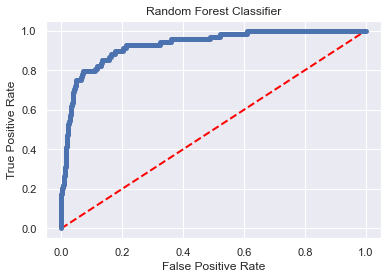

In [219]:
plt.plot([0, 1], [0, 1], 'k--', color = 'red', lw = 2)
plt.plot( fprate, tprate, color = 'b', lw = 5, label = 'ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest Classifier')
plt.show()

##### Deploy the Model

In [220]:
import pickle
filename = 'primary_fuel.pkl'
pickle.dump(final_model, open(filename, 'wb'))

###### Conclusion

In [221]:
load_model = pickle.load(open('primary_fuel.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)


0.8082901554404145


In [222]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)

# Creating Dataframe
conclusion = pd.DataFrame({'original primary_fuel': original, 'Predicted primary_fuel': predicted}, index = range(len(original)))

In [225]:
conclusion .sample(10)

,original primary_fuel,Predicted primary_fuel
474,0,1
245,7,7
237,2,2
478,6,6
223,3,3
453,1,1
332,0,0
116,2,5
438,4,4
47,6,6


In [246]:
# -----------------------------------------------------------------------------------------------------

In [151]:
df.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,Solar,2011.0,National Renewable Energy Laboratory,NREL
1,98.0,24.7663,74.6090,Coal,2013.0,Ultratech Cement ltd,WRI
2,39.2,21.9038,69.3732,Wind,2013.0,CDM,WRI
3,135.0,23.8712,91.3602,Gas,2004.0,Central Electricity Authority,WRI
4,1800.0,21.9603,82.4091,Coal,2015.0,Central Electricity Authority,WRI


In [152]:
df2 = df.copy()

In [153]:
# Target variable : capacity_mw

obj_col = df2.select_dtypes(include = 'object').keys()
obj_col

# Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

Index(['primary_fuel', 'source', 'geolocation_source'], dtype='object')

##### Applying ordinal encoding to the feature columns

In [154]:
oe = OrdinalEncoder()

for i in obj_col:
    df2[i] = oe.fit_transform(df[i].values.reshape(-1,1))
df2.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1.0,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7.0,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0


###### Outliers removing technique

In [155]:
z = np.abs(zscore(df2))
threshold = 3
df2_z = df2[(z<3.1).all(axis = 1)]
df2_z.shape

# (857, 7)

(857, 7)

In [156]:
((df2.shape[0] -df2_z.shape[0]) / df2.shape[0] ) * 100

# 5.616740088105727  by applying threshold 3.1
# because threshold 3 was giving data loss (8 % approx) which is not in acceptable condition 

# 5.616740088105727

5.616740088105727

##### Apply to original Dataset

In [157]:
z = np.abs(zscore(df2))
threshold = 3
df2 = df2[(z<3.1).all(axis = 1)]
df2.shape

# (857, 7)

(857, 7)

In [158]:
df2.head()

,capacity_mw,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,2.5,28.1839,73.2407,6.0,2011.0,109.0,1.0
1,98.0,24.7663,74.6090,1.0,2013.0,174.0,2.0
2,39.2,21.9038,69.3732,7.0,2013.0,21.0,2.0
3,135.0,23.8712,91.3602,2.0,2004.0,22.0,2.0
4,1800.0,21.9603,82.4091,1.0,2015.0,22.0,2.0


#### Impact of features to the target

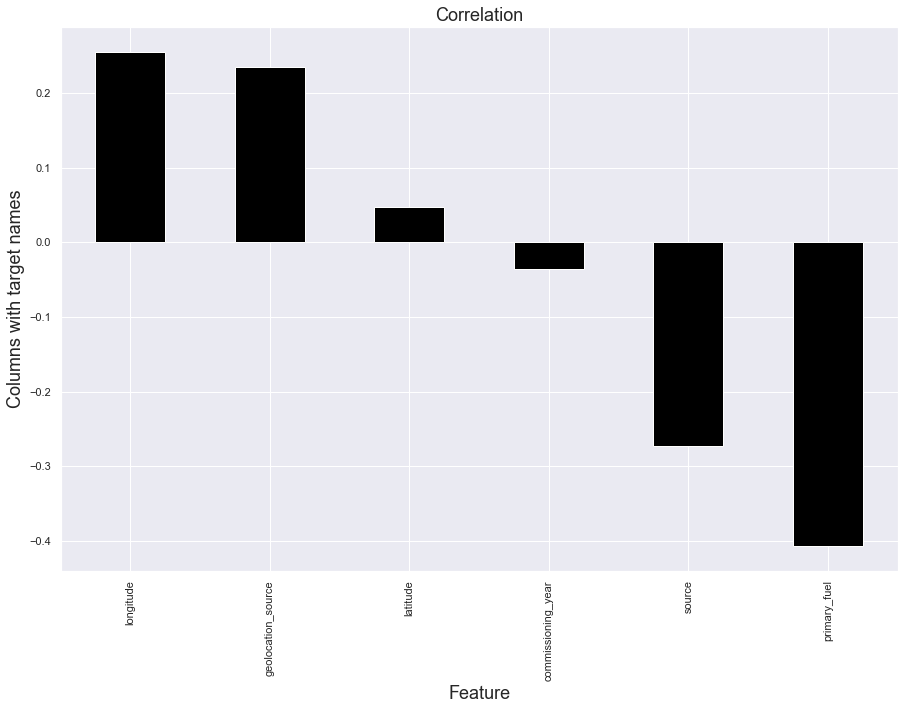

In [159]:
plt.figure(figsize = (15, 10))
df1.corr()['capacity_mw'].sort_values(ascending = False).drop(['capacity_mw']).plot(kind = 'bar', color = 'black')
plt.xlabel( 'Feature', fontsize = 18)
plt.ylabel( 'Columns with target names', fontsize = 18)
plt.title ('Correlation', fontsize = 18)
plt.show()

##### Seperating Dataset into x2 and y2

In [185]:
x2 = df2.drop(columns= ['capacity_mw'])
y2 = df2['capacity_mw']

print('shape of test', x2.shape)
print('shape of y', y2.shape)

# shape of test (857, 6)
# shape of y (857,)

shape of test (857, 6)
shape of y (857,)


#### Skewness of x2 (features)

In [186]:
x2.skew()

# latitude             -0.123729
# longitude             0.987934
# primary_fuel          0.432416
# commissioning_year   -1.587338
# source                1.793669
# geolocation_source   -2.135436

latitude             -0.123729
longitude             0.987934
primary_fuel          0.432416
commissioning_year   -1.587338
source                1.793669
geolocation_source   -2.135436
dtype: float64

In [187]:
x2['longitude'] = np.log1p(x2['longitude'])

#### VIF (Checking Multicolinearity)

In [188]:
cal_vif(x2)

# Columns Name	VIF
# 0	latitude	13.661660
# 1	longitude	5696.823892
# 2	primary_fuel	4.768449
# 3	commissioning_year	5879.176773
# 4	source	3.176393
# 5	geolocation_source	14.371280

,Columns Name,VIF
0,latitude,13.661660
1,longitude,5696.823892
2,primary_fuel,4.768449
3,commissioning_year,5879.176773
4,source,3.176393
5,geolocation_source,14.371280


In [190]:
# longitude and Commisioning columns are showing high VIF value, 
# and as per above "impact of features graph" we found commissioning_year is contributing less to the target 
# but as by seeing data, we found we have very less data to build model therefore, it would be better if we apply proceding on 
# Existing data 

###### Scaling 

In [191]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [192]:
x2_scale = ss.fit_transform(x2)
x2 = pd.DataFrame(x2_scale, columns = x2.columns)

In [193]:
# y2 = np.log(1+y2)
x2.head()


,latitude,longitude,primary_fuel,commissioning_year,source,geolocation_source
0,1.148750,-0.899237,1.189236,0.475336,1.521239,-1.071242
1,0.590464,-0.568666,-0.980145,0.619586,3.026107,0.397645
2,0.122857,-1.867628,1.623112,0.619586,-0.516121,0.397645
3,0.444244,3.053674,-0.546269,-0.029540,-0.492969,0.397645
4,0.132086,1.208505,-0.980145,0.763836,-0.492969,0.397645


In [194]:
y2 = np.log(1 + y2)  # y2 is having very spreaded therefore, features are fail to predict that
                     # therefore applied a np.log(1 + y2) operation to this

## Machine learning for Average Price Prediction

In [195]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

# Import Libraries
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso

In [196]:
def best_randomstate (model, x, y):
    best_fit = []
    for i in range(0, 200 ) :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train, )
        testing = r2_score(y_test, m_predict_test, )

    #     print('At random state', i, 'the training accuracy is :-', training2)
    #     print('At random state', i, 'the testing accuracy is :-', testing2) 
    #     print('\n')

        if np.abs(round(training, 2) - round(testing, 2)) < 0.01:
            best_fit.append(i)
    return (best_fit)

In [197]:
def check_model (model, x, y, r_list):
    for i in r_list :
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
        m = model()
        m.fit(x_train, y_train)
        m_predict_train = m.predict(x_train)
        m_predict_test = m.predict(x_test)

        training = r2_score(y_train, m_predict_train, )
        testing = r2_score(y_test, m_predict_test, )

        print('At random state', i, 'the training r2_score is :', training)
        print('At random state', i, 'the testing r2_score is :', testing) 
        print('_________________________________________________________________')

In [198]:
def train(algo, x, y, best_fit):
    # train the model
    model = algo()
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = best_fit)
    model.fit(x_train, y_train)
    
    # predict the training set
    m_predict_train = model.predict(x_train)
    m_predict_test = model.predict(x_test)
    
    training = r2_score(y_train, m_predict_train )
    testing = r2_score(y_test, m_predict_test, )

    print('Training r2_score is :', training)
    print('Testing r2_score is :', testing) 
    
    print('__________________________________________________________________')
    print('Mean Squared Error: ', mean_squared_error(m_predict_test, y_test) )
    print('Mean Absolute error: ', mean_absolute_error(m_predict_test, y_test) )
    print('___________________________________________________________________')
#     print('Cross value score')
    
# #     # perform cross-validation
# #     for i in range(3, 12):
# #         cv_score = cross_val_score(model, x, y, cv = i ).mean()
# #         print('cv score',  cv_score ,'at', i, 'cross fold')

    plt.figure(figsize = (10, 5))
    plt.scatter(x = y_test, y = m_predict_test, color = 'r')
    plt.plot(y_test, y_test, color = 'g')
    plt.xlabel('Actual', fontsize= 18 )
    plt.ylabel('Predicted', fontsize = 18)
    plt.title(str(algo), fontsize = 20)


### Model 1: LinearRegression

In [200]:
best_fit1 = best_randomstate(LinearRegression, x2, y2)
print(best_fit1)

# [3, 5, 7, 8, 11, 13, 15, 55, 63, 88, 93, 108, 111, 113, 127, 137, 139, 151, 154, 159, 163, 176, 185]
# best_fit1: those random states where model is giving almost similar accuracy of training and testing

[3, 5, 7, 8, 11, 13, 15, 55, 63, 88, 93, 108, 111, 113, 127, 137, 139, 151, 154, 159, 163, 176, 185]


In [207]:
check_model(LinearRegression, x2, y2, best_fit1)

At random state 3 the training r2_score is : 0.43098478668835427
At random state 3 the testing r2_score is : 0.4299015523123222
_________________________________________________________________
At random state 5 the training r2_score is : 0.4321896033063132
At random state 5 the testing r2_score is : 0.4251767452927806
_________________________________________________________________
At random state 7 the training r2_score is : 0.42831949576698813
At random state 7 the testing r2_score is : 0.4327061972727406
_________________________________________________________________
At random state 8 the training r2_score is : 0.43147373747541307
At random state 8 the testing r2_score is : 0.4254243228197453
_________________________________________________________________
At random state 11 the training r2_score is : 0.42884183479166926
At random state 11 the testing r2_score is : 0.4270151015378244
_________________________________________________________________
At random state 13 the traini

Training r2_score is : 0.4311405735560122
Testing r2_score is : 0.43041827259104326
__________________________________________________________________
Mean Squared Error:  1.9893215302155165
Mean Absolute error:  1.1676186589913966
___________________________________________________________________


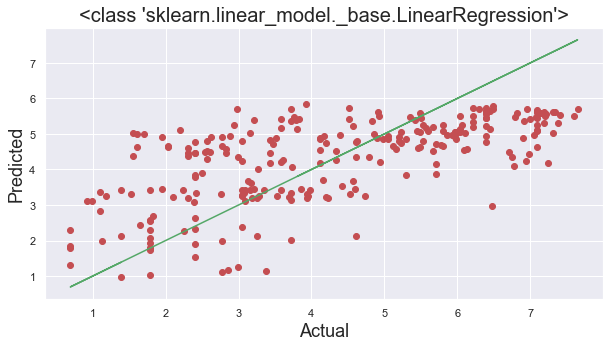

In [208]:
train (LinearRegression, x2, y2, 139)

In [209]:
# Accuracy of Training and test is almost same, here model is not over fitted or under fitted

#### Cross_val_score for LinearRegression

In [210]:
for val in range (3, 13):
    cv = cross_val_score(LinearRegression(), x2, y2, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.4184277504559333 at cross fold value 3
cv score is 0.41818427052013785 at cross fold value 4
cv score is 0.4162054551926662 at cross fold value 5
cv score is 0.4187631560211778 at cross fold value 6
cv score is 0.4023427045702598 at cross fold value 7
cv score is 0.41524479939038583 at cross fold value 8
cv score is 0.4085886693383964 at cross fold value 9
cv score is 0.4101637228169982 at cross fold value 10
cv score is 0.4094546503063459 at cross fold value 11
cv score is 0.40335734183173294 at cross fold value 12


In [236]:
# Giving maximum value of cv (0.4187631560211778) at cross fold 6 
# Training r2_score is : 0.4311405735560122
# Testing r2_score is : 0.43041827259104326

### Model 2: SVR

In [241]:
best_fit2 = best_randomstate(SVR, x2, y2)
print(best_fit2)

# [8, 80, 122, 123, 183]
# best_2: those random stats where model is giving almost similar accuracy of training and testing

[8, 80, 122, 123, 183]


In [243]:
check_model(SVR, x2, y2, best_fit2)

At random state 8 the training r2_score is : 0.545005946611075
At random state 8 the testing r2_score is : 0.5481895893373936
_________________________________________________________________
At random state 80 the training r2_score is : 0.5501476809922453
At random state 80 the testing r2_score is : 0.5452106674082471
_________________________________________________________________
At random state 122 the training r2_score is : 0.5509484110934957
At random state 122 the testing r2_score is : 0.5528089335160762
_________________________________________________________________
At random state 123 the training r2_score is : 0.5385550868405518
At random state 123 the testing r2_score is : 0.539307077012285
_________________________________________________________________
At random state 183 the training r2_score is : 0.5553006725162397
At random state 183 the testing r2_score is : 0.5634403138308451
_________________________________________________________________


Training r2_score is : 0.5385550868405518
Testing r2_score is : 0.539307077012285
__________________________________________________________________
Mean Squared Error:  1.5994030094735252
Mean Absolute error:  0.9963072147500269
___________________________________________________________________


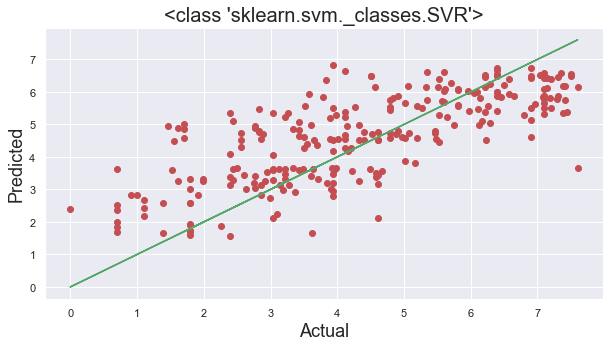

In [244]:
train(SVR, x2, y2, 123)  

###### CV score for SVR

In [271]:
for val in range (5, 15):
    cv = cross_val_score(SVR(), x2, y2, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.5052885166116715 at cross fold value 5
cv score is 0.5054595656996248 at cross fold value 6
cv score is 0.4944366461526063 at cross fold value 7
cv score is 0.5058887746563644 at cross fold value 8
cv score is 0.5052462882743356 at cross fold value 9
cv score is 0.5046413335369463 at cross fold value 10
cv score is 0.5073039728452491 at cross fold value 11
cv score is 0.5041621877868557 at cross fold value 12
cv score is 0.5072502220827052 at cross fold value 13
cv score is 0.4903701134083884 at cross fold value 14


In [272]:
# Training r2_score is : 0.5385550868405518
# Testing r2_score is : 0.539307077012285
# and Highest CV value 0.5073 at cross fold 11

### Model 3: Ridge

In [252]:
best_fit3 = best_randomstate(Ridge, x2, y2)
print(best_fit3)

# [3, 5, 7, 8, 11, 13, 15, 27, 35, 55, 63, 88, 93, 108, 111, 113, 127, 137, 139, 151, 154, 159, 163, 176, 185]
# Those random state where model is giving almost equal accuracy of testing and training data

[3, 5, 7, 8, 11, 13, 15, 27, 35, 55, 63, 88, 93, 108, 111, 113, 127, 137, 139, 151, 154, 159, 163, 176, 185]


In [254]:
check_model(Ridge, x2, y2, best_fit3)

At random state 3 the training r2_score is : 0.43098316696296446
At random state 3 the testing r2_score is : 0.4300422489361293
_________________________________________________________________
At random state 5 the training r2_score is : 0.4321882175042666
At random state 5 the testing r2_score is : 0.42524483472189767
_________________________________________________________________
At random state 7 the training r2_score is : 0.42831799689224925
At random state 7 the testing r2_score is : 0.43272390174718
_________________________________________________________________
At random state 8 the training r2_score is : 0.43147233789796335
At random state 8 the testing r2_score is : 0.4253919330989988
_________________________________________________________________
At random state 11 the training r2_score is : 0.4288405710693636
At random state 11 the testing r2_score is : 0.42697253873043695
_________________________________________________________________
At random state 13 the trainin

Training r2_score is : 0.43113938083349557
Testing r2_score is : 0.4303426625781894
__________________________________________________________________
Mean Squared Error:  1.9895856057980572
Mean Absolute error:  1.16789111030865
___________________________________________________________________


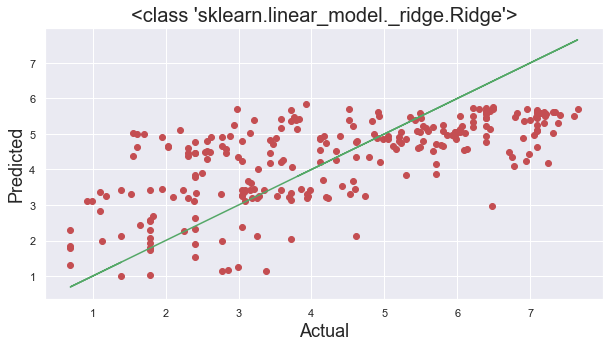

In [256]:
train(Ridge, x2, y2, 139)  

##### Cross val Score for Ridge

In [257]:
for val in range (5, 15):
    cv = cross_val_score(Ridge(), x2, y2, cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.4162437108293238 at cross fold value 5
cv score is 0.4187940480312489 at cross fold value 6
cv score is 0.40237570630214753 at cross fold value 7
cv score is 0.415274534640679 at cross fold value 8
cv score is 0.40860838859971654 at cross fold value 9
cv score is 0.4101832858261586 at cross fold value 10
cv score is 0.4094761172927628 at cross fold value 11
cv score is 0.40338125359502025 at cross fold value 12
cv score is 0.4070984843903702 at cross fold value 13
cv score is 0.3923862215135391 at cross fold value 14


In [273]:
# Training r2_score is : 0.43113938083349557
# Testing r2_score is : 0.4303426625781894
# Highest cv value 0.4187 at cross fold 6

### Model 4: AdaBoostRegressor

In [267]:
from sklearn.ensemble import AdaBoostRegressor

In [262]:
best_fit4 = best_randomstate(AdaBoostRegressor, x2, y2)
print(best_fit4)

# [0, 8, 45, 49, 55, 61, 69, 103, 126, 129, 136, 145, 153, 188, 197]
# Those random stats where model is giving almost equal accuracy of training and testing dataset

[0, 8, 45, 49, 55, 61, 69, 103, 126, 129, 136, 145, 153, 188, 197]


In [264]:
check_model(AdaBoostRegressor, x2, y2, best_fit4)

At random state 0 the training r2_score is : 0.5983056432513215
At random state 0 the testing r2_score is : 0.6221332664435045
_________________________________________________________________
At random state 8 the training r2_score is : 0.555107514441711
At random state 8 the testing r2_score is : 0.5742041129615079
_________________________________________________________________
At random state 45 the training r2_score is : 0.5978064811757519
At random state 45 the testing r2_score is : 0.6051981508910912
_________________________________________________________________
At random state 49 the training r2_score is : 0.5858347938051108
At random state 49 the testing r2_score is : 0.5522497218236608
_________________________________________________________________
At random state 55 the training r2_score is : 0.5855018116843029
At random state 55 the testing r2_score is : 0.5707469257008402
_________________________________________________________________
At random state 61 the trainin

Training r2_score is : 0.6241925226793303
Testing r2_score is : 0.6180359346679323
__________________________________________________________________
Mean Squared Error:  1.3227040906699414
Mean Absolute error:  0.920486948033105
___________________________________________________________________


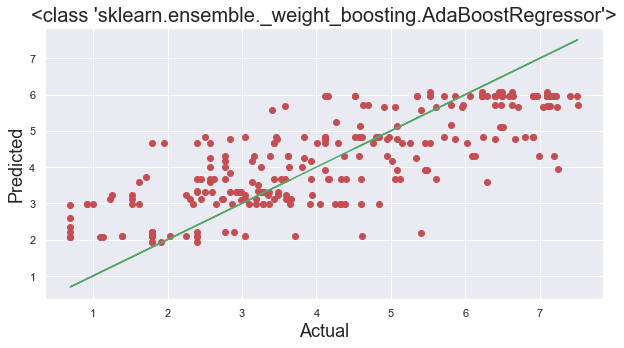

In [265]:
train(AdaBoostRegressor, x2, y2, 136)  

##### Cross val Score for AdaBoostRegressor

In [274]:
for val in range (2, 12):
    cv = cross_val_score(AdaBoostRegressor(), x2, y2,  cv = val).mean()
    print('cv score is', cv, 'at cross fold value', val)

cv score is 0.5401826117945107 at cross fold value 2
cv score is 0.5705907784475638 at cross fold value 3
cv score is 0.5643880209085833 at cross fold value 4
cv score is 0.5462760696121851 at cross fold value 5
cv score is 0.5551212304290857 at cross fold value 6
cv score is 0.539748842769568 at cross fold value 7
cv score is 0.5415855172400059 at cross fold value 8
cv score is 0.5475750238154837 at cross fold value 9
cv score is 0.5358107988853861 at cross fold value 10
cv score is 0.5618800207426842 at cross fold value 11


In [275]:
# Training r2_score is : 0.6241925226793303
# Testing r2_score is : 0.6180359346679323
# Highest CV value 0.5705 at cross fold 3

In [276]:
# Model               	Training R2	         Testing R2	       CV	        Difference	
# LinearRegression	    0.4311	             0.4304	          0.4101	    0.0203	     at 6 cross fold
# SVR	                0.5385	             0.5393	          0.5073	    0.032	     at 11 cross fold
# Ridge	                0.4311	             0.4303	          0.4187	    0.0116	     at 6 cross fold
# AdaBoostRegressor	    0.6241	             0.618	          0.5705	    0.0475	     at 3 cross fold


In [278]:
# As given in above observation, least difference of cv and Accuracy we are getting from Ridge model 
# LinearRegession is performing as neaer to Ridge model
# SVR model is also performing good but we consider least cv and accuracy difference model
# AdaBoostRegressor is giving highest accuracy and hight cv difference too,
# therefore we can not consider AdaboostRegressor as final model


### Ensemble Techniques for Ridge Model

In [289]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 139 )

# As by above experiment, Ridge is giving highest cross val score value at cross fold 6 and best performace at random state 139

In [290]:
parameter = {'alpha' : [0.001, 0.01, 0.1],
            'normalize' : [True, False],
            'solver' : ['auto', 'svd', 'cholesky', 'lsqr', 'saga'],
            'max_iter' : [100, 1000, 10000, 15000]} 

In [291]:
gcv = GridSearchCV(estimator = Ridge(), param_grid = parameter, cv = 6)

In [292]:
gcv.fit(x_train, y_train)

# GridSearchCV(cv=6, estimator=Ridge(),
#              param_grid={'alpha': [0.001, 0.01, 0.1],
#                          'max_iter': [100, 1000, 10000, 15000],
#                          'normalize': [True, False],
#                          'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']})

GridSearchCV(cv=6, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1],
                         'max_iter': [100, 1000, 10000, 15000],
                         'normalize': [True, False],
                         'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'saga']})

In [293]:
gcv.best_params_

# {'alpha': 0.01, 'max_iter': 100, 'normalize': True, 'solver': 'saga'}

{'alpha': 0.01, 'max_iter': 100, 'normalize': True, 'solver': 'saga'}

In [256]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 129)

model = Ridge(alpha = 0.01, max_iter = 100, normalize = True, solver = 'saga')
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred_train = model.predict(x_train)

train_accuracy = r2_score(y_train, pred_train )
test_accuracy = r2_score(y_test, pred )
print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(pred, y_test) )

Training accuracy:  0.40448995252568787
Testing accuracy:  0.48578045566611283
______________________________________________
Mean squared error:  1.7643311230052336
Mean absolute error:  1.0971317409421155


In [297]:
cross_val_score(model, x2, y2, cv = 6).mean()

0.4189411200204452

In [257]:
# This ensemble technique on Ridge model have decreased the model performace
# Therefore Simple Ridge model is giving more good perference as compare to this ensembled Ridge
# This model is giving underfitted model

### Ensemble Techniques on SVR

In [237]:
from sklearn.model_selection import GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 123 )

# As by above experiment, SVR is giving highest cross val score value at cross fold 11 and best performace at random state 123

In [240]:
para = {'kernel' : ['linear', 'poly', 'rbf'],
            'gamma' : ['scale', 'auto'],
            'shrinking' : [True, False],
            'C' : [0.1,1, 10, 100] } 

In [241]:
gcv = GridSearchCV(estimator = SVR(), param_grid = para, cv = 11)
gcv.fit(x_train, y_train)

GridSearchCV(cv=11, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf'],
                         'shrinking': [True, False]})

In [242]:
gcv.best_params_

# {'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': False}

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': False}

In [250]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 129)

model = SVR(C = 10, gamma = 'auto', kernel = 'rbf')
model.fit(x_train, y_train)
pred = model.predict(x_test)
pred_train = model.predict(x_train)

train_accuracy = r2_score(y_train, pred_train )
test_accuracy = r2_score(y_test, pred )
print('Training accuracy: ', train_accuracy)
print('Testing accuracy: ', test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(pred, y_test) )
print('Mean absolute error: ', mean_absolute_error(pred, y_test) )

Training accuracy:  0.6262924977277533
Testing accuracy:  0.5731987546396344
______________________________________________
Mean squared error:  1.4643914818565211
Mean absolute error:  0.9314865744679512


In [258]:
# By applying ensemble technique on SVC giving overfitted model

In [260]:
# As per all observation i found, Simple Ridge model is giving good accuray which is almost equal to highest cv value
# But is giving less accuracy

# And AdaBost  model is giving highest accuracy with not much difference between cv and accuracy
# therefore we finalize the model as AdaBoost

# Note: As we always consider that model as final model , which showes least difference between cv and accuracy,
# Therefore, i have selected Ridge model as final model

### Final model (Ridge Model)

In [273]:
x_train, x_test, y_train, y_test = train_test_split(x2, y2, test_size = 0.30, random_state = 139)

final_model = Ridge()
final_model.fit(x_train, y_train)
final_pred = final_model.predict(x_test)
final_pred_train = final_model.predict(x_train)

final_train_accuracy = r2_score(y_train, final_pred_train)
final_test_accuracy = r2_score(y_test, final_pred)
print('Training accuracy: ', final_train_accuracy)
print('Testing accuracy: ', final_test_accuracy)
print('______________________________________________')
print('Mean squared error: ', mean_squared_error(final_pred, y_test ) )
print('Mean absolute error: ', mean_absolute_error(  final_pred, y_test ) )

Training accuracy:  0.43113938083349557
Testing accuracy:  0.4303426625781894
______________________________________________
Mean squared error:  1.9895856057980572
Mean absolute error:  1.16789111030865


In [275]:
cv = cross_val_score(final_model, x2, y2,  cv = 6).mean()
cv

0.4187940480312489

<AxesSubplot:title={'center':'Model Coefficients'}>

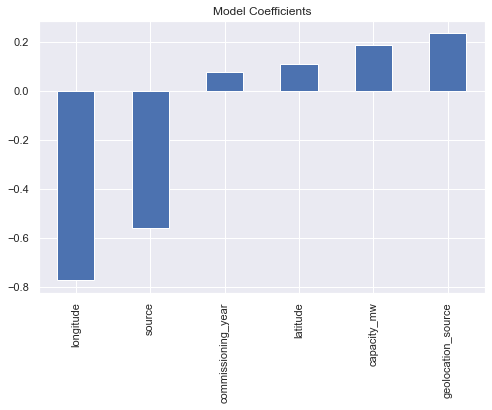

In [276]:
plt.figure(figsize = (8, 5))
coef = pd.Series(final_model.coef_, x1.columns).sort_values()
coef.plot(kind = 'bar', title = 'Model Coefficients')

### Graph

Text(0.5, 1.0, 'LinearRegression Machine Learning Model')

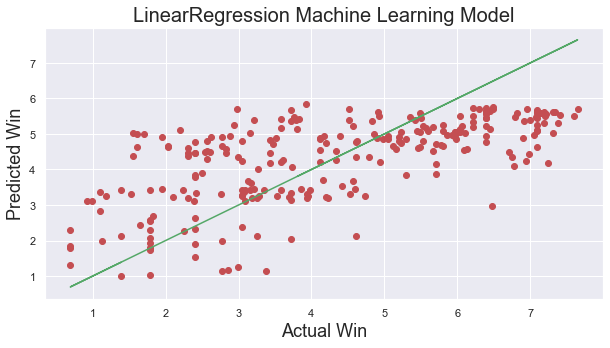

In [277]:
plt.figure(figsize = (10, 5))
plt.scatter(x = y_test, y = final_pred, color = 'r')
plt.plot(y_test, y_test, color = 'g')
plt.xlabel('Actual Win', fontsize= 18 )
plt.ylabel('Predicted Win', fontsize = 18)
plt.title('LinearRegression Machine Learning Model', fontsize = 20)

### Deploy model

In [278]:
import pickle
filename = 'capacity_mw_predictor.pkl'
pickle.dump(final_model, open(filename, 'wb'))

### Loading the model

In [279]:
load_model =  pickle.load(open('capacity_mw_predictor.pkl', 'rb'))
result = load_model.score(x_test, y_test)
print(result)

0.4303426625781894


### Conclusion

In [280]:
predicted = np.array(load_model.predict(x_test))
original = np.array(y_test)
# convert columns in to np.array 

In [281]:
print(predicted.shape)
print(original.shape)
print(x_test.shape)
print(y_test.shape)

(258,)
(258,)
(258, 6)
(258,)


In [282]:
conclusion = pd.DataFrame({'Original capacity': original, 'predicted capacity': predicted}, index = range(len(original)))

In [293]:
conclusion.sample(10)

,Original capacity,predicted capacity
121,2.028148,4.638362
79,5.231109,5.048092
136,7.346655,5.615675
38,5.420535,5.394842
219,7.080868,5.481137
133,1.386294,0.990224
153,4.228293,3.201231
203,2.104134,3.216220
185,5.707110,3.881516
35,5.802118,5.082088
